# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.63'

## Specifying filetype, and folder as before

In [79]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [80]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong')
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

In [81]:
GroupN_df

filename rays_present  approx_split    Diad1_pos    Diad2_pos  \
0  K21-61-FI#2.txt        False    103.205802  1285.524321  1388.730124   
1  K21-61-FI#3.txt        False    103.238800  1285.458326  1388.697126   
2  K21-64-FI#1.txt        False    103.200303  1285.458326  1388.658629   
3  K21-64-FI#3.txt        False    103.211302  1285.425328  1388.636630   
4  K21-64-FI#4.txt        False    103.249799  1285.606815  1388.856615   
5  K21-64-FI#5.txt        False    103.222301  1285.414329  1388.636630   
6  K21-64-FI#6.txt        False    103.227801  1285.397830  1388.625631   
7  K21-64-FI#7.txt        False    103.244300  1285.370332  1388.614632   

       HB1_pos      HB2_pos      C13_pos  Diad1_abs_prom  Diad2_abs_prom  ...  \
0  1265.159241  1410.184127  1370.504395      955.478360     1706.374275  ...   
1  1265.269234  1410.156629  1370.482396      766.017540     1432.627080  ...   
2  1265.098746  1410.063136  1370.454898      849.887977     1570.529417  ...   
3  1265.115244  1410.057636  1370.449398     1269.525591     2397.923475  ...   
4  1265.412224  1410.173128  1370.526393      856.575511     1380.275696  ...   
5  1265.120744  1410.057636  1370.454898      945.054410     1823.109985  ...   
6  1265.021751  1410.024638  1370.350405      701.246414     1352.830017  ...   
7  1265.098746  1410.074135  1370.410901     1117.463853     2151.265518  ...   

   HB2_height  C13_height  Diad1_height  HB1_height  Diad1_Median_Bck  \
0  830.308351  734.866071   1663.478360  771.701891        708.000000   
1  807.312070  735.400219   1477.717552  758.146166        711.700012   
2  806.640694  718.270424   1540.887977  744.783805        691.000000   
3  853.625141  725.962205   1952.025591  776.781263        682.500000   
4  813.782374  718.741649   1556.675517  760.243530        700.100006   
5  823.478774  724.468141   1641.154416  763.452421        696.100006   
6  787.435693  718.615856   1401.146408  747.219754        699.899994   
7  832.899109  716.717713   1795.763841  759.349289        678.299988   

   Diad2_Median_Bck  C13_HB2_abs_prom_ratio  Diad2_HB2_Valley_prom  \
0        702.300003                4.854557               1.003426   
1        707.000000                3.996572               1.007268   
2        686.150009                4.213833               0.994483   
3        679.299988                4.594842               1.007645   
4        695.799988                6.006580               1.001727   
5        689.700012                4.901246               1.003628   
6        694.449997                4.548498               0.997553   
7        675.949997                4.652659               1.001921   

   HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0                  28.553593                  61.375814  
1                  21.446380                  49.391533  
2                  26.793145                  63.816953  
3                  53.746519                 100.457847  
4                  28.106681                  57.787403  
5                  36.402188                  77.661935  
6                  17.074023                  36.900460  
7                  45.881917                  89.479756  

[8 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [82]:
Diad_Files =GroupN_df['filename']
i=3
Diad_Files[i]

'K21-64-FI#3.txt'

### Lets plot the diad to have a look at it

K21-64-FI#3.txt


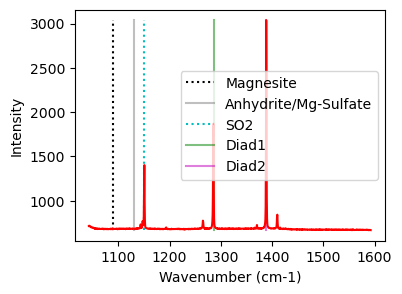

In [83]:
print(GroupN_df['filename'].iloc[i])
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [84]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [85]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1269.5255909337711, HB_prom=95.78126276368437, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.380946       1285.380996        0.001737       2160.427029   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma     HB1_Cent    HB1_Area  HB1_Sigma  \
0           0.585608                  0  1265.140449  230.634036   0.772302   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0            1351.557231          3.1109        0.682929    1.171216   

         Diad1_refit  
0  Flagged Warnings:

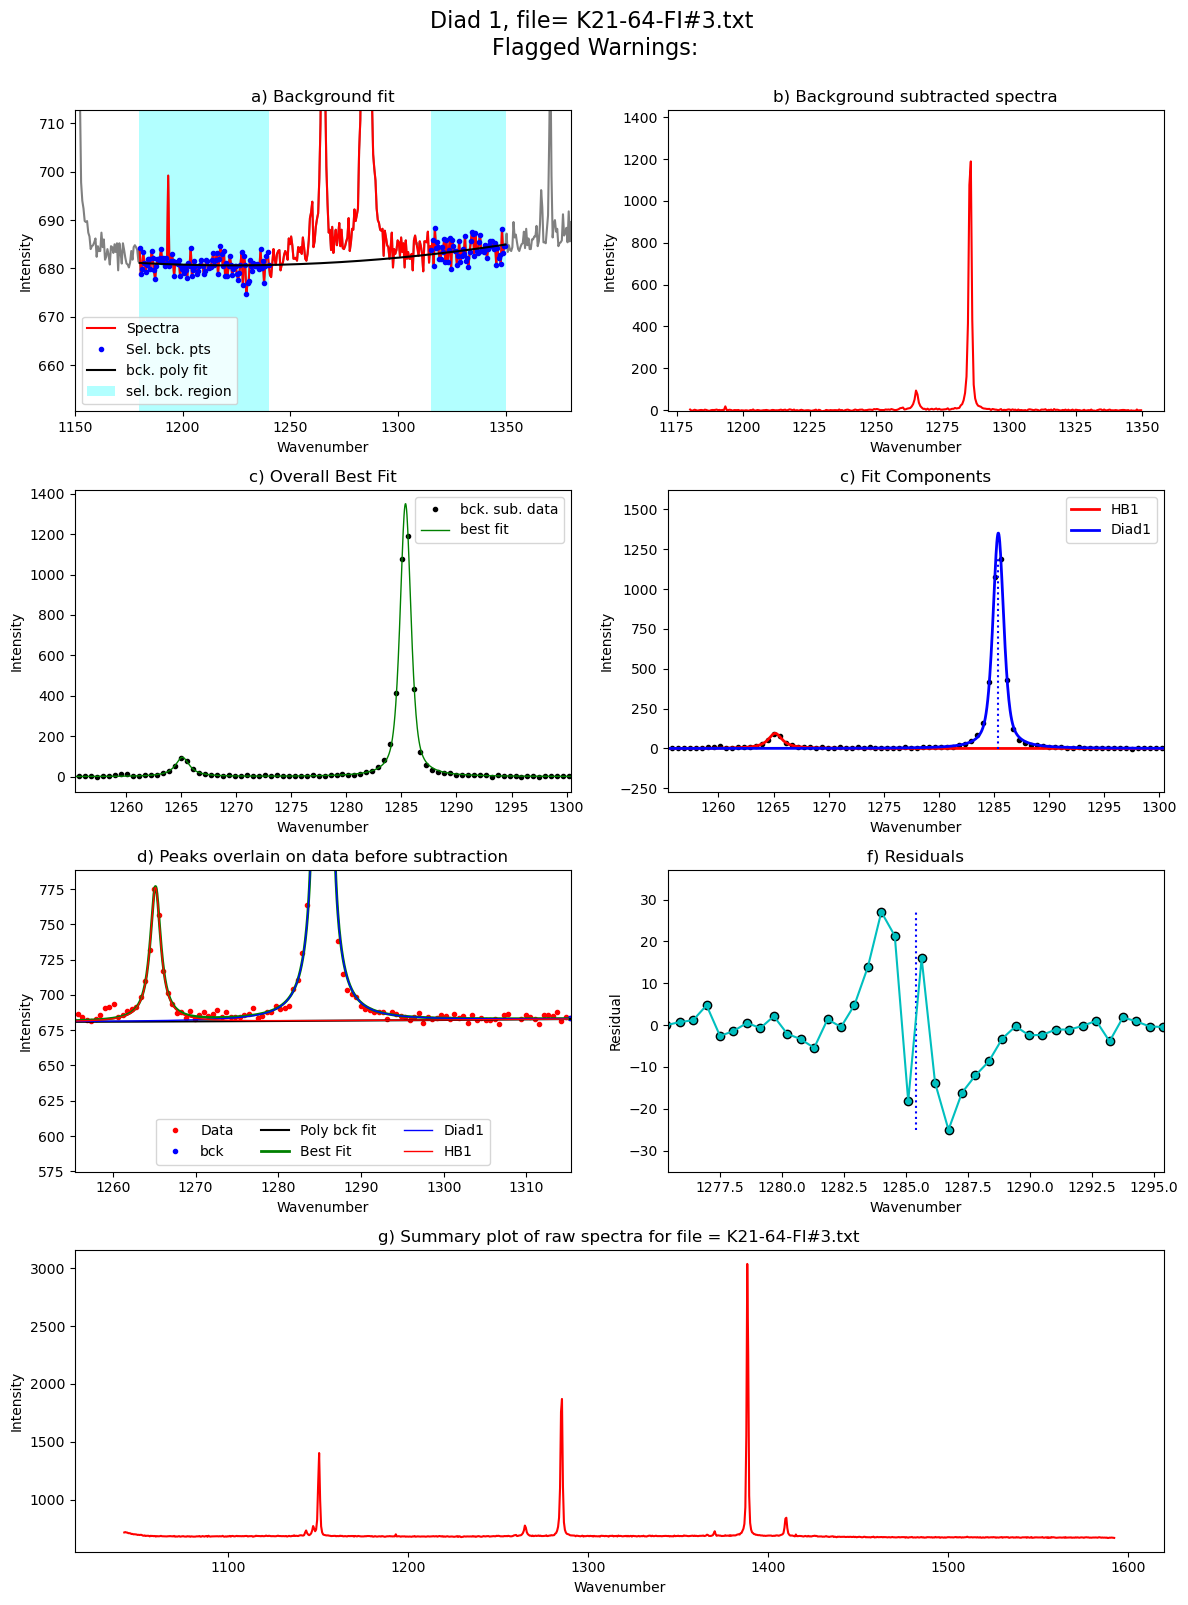

In [86]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [87]:
diad1_fit_config2=diad1_fit_config_init
diad1_fit_config2.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]

## Fit diad2

In [88]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.6,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, 
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=1000, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=2397.9234751040535, HB_prom=179.02516521282075, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=38.96220500355389)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0            1388.6821        1388.68205        0.001279       3286.975987   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0             0.5132                  0  1410.023729  360.107521   0.652726   

      C13_Cent   C13_Area  C13_Sigma  Diad2_Combofit_Height  Diad2_Residual  \
0  1371.817473  13.160508   0.256462            2473.830663        3.804281   

   Diad2_Prop_Lor  Diad2_fwhm        Diad2_refit  
0         0.55149    1.026399  Flagged Warnings:

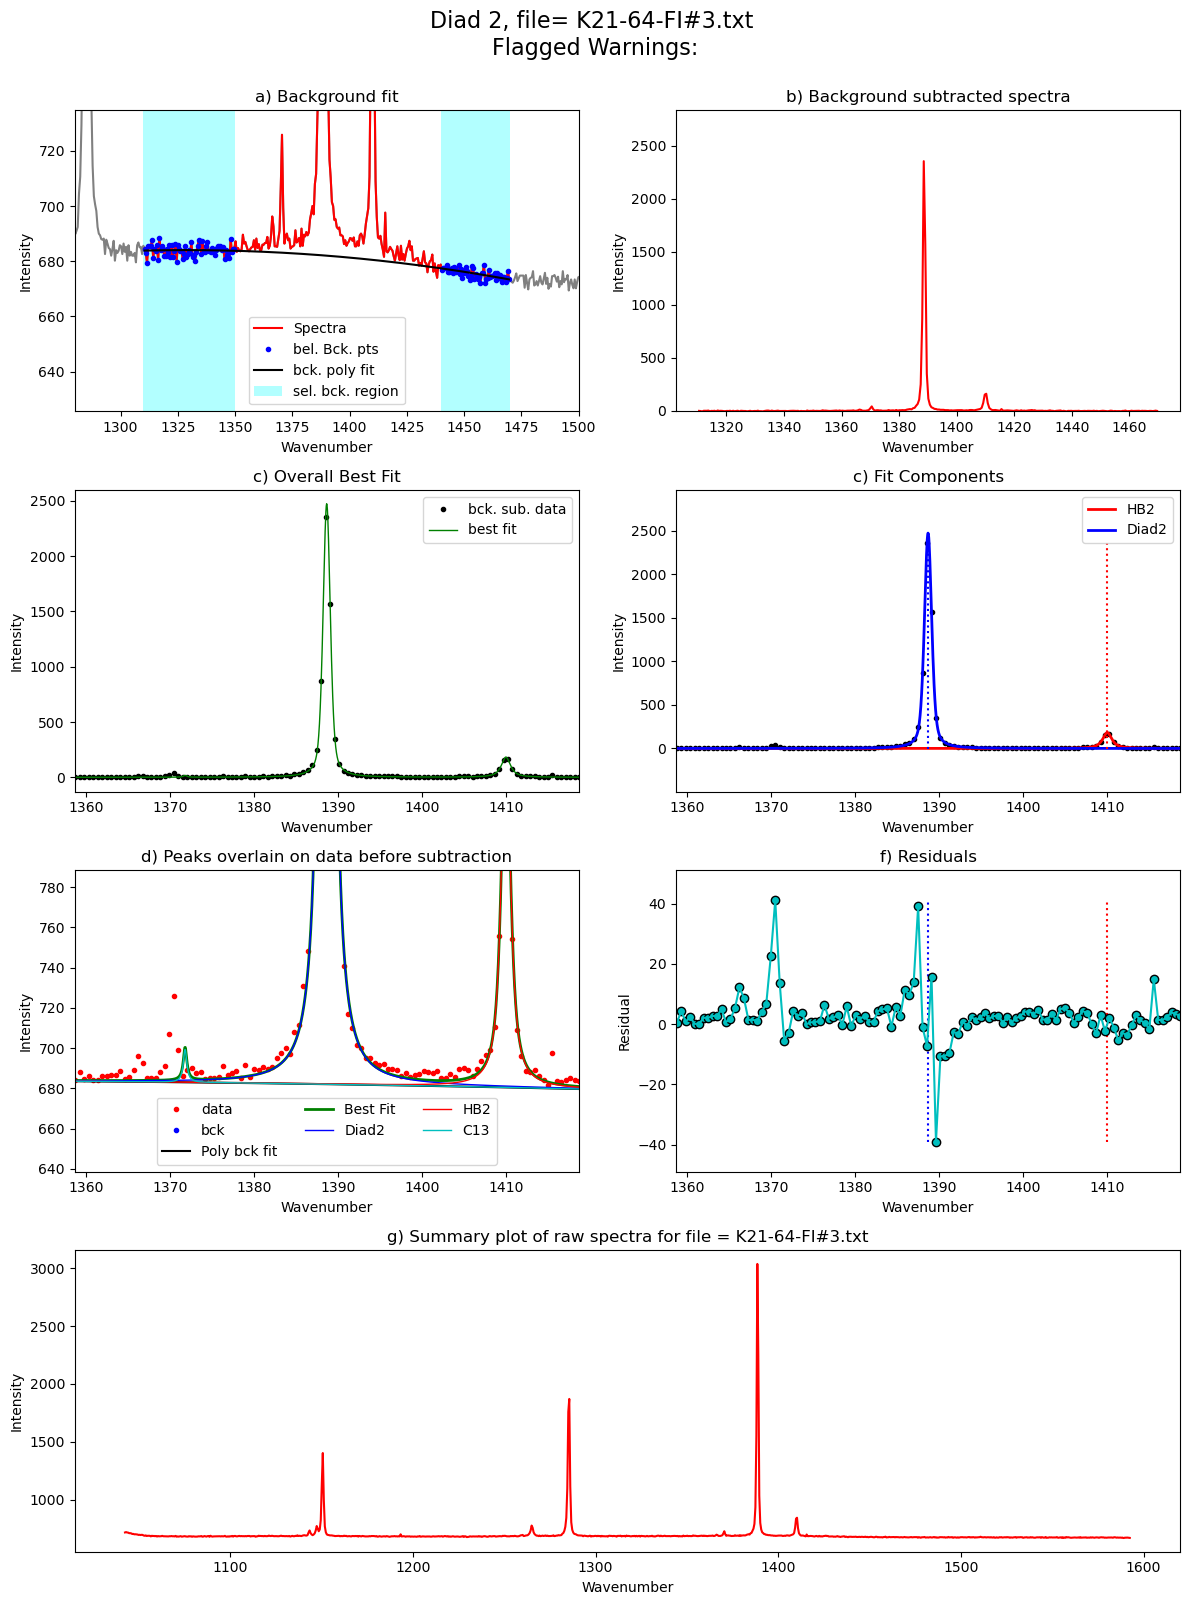

In [89]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i], filetype=filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

### Update the sigma

In [90]:
diad2_fit_config2=diad2_fit_config_init
diad2_fit_config2.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
print(Diad2_fit['Diad2_Voigt_Sigma'][0])

0.5131997365293287


## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/8 [00:00<?, ?it/s]

Processing file: K21-61-FI#2.txt


 12%|█▎        | 1/8 [00:02<00:14,  2.01s/it]

Processing file: K21-61-FI#3.txt


 25%|██▌       | 2/8 [00:04<00:12,  2.09s/it]

Processing file: K21-64-FI#1.txt


 38%|███▊      | 3/8 [00:06<00:10,  2.16s/it]

Processing file: K21-64-FI#3.txt


 50%|█████     | 4/8 [00:09<00:09,  2.37s/it]

Processing file: K21-64-FI#4.txt


 62%|██████▎   | 5/8 [00:11<00:07,  2.45s/it]

Processing file: K21-64-FI#5.txt


 75%|███████▌  | 6/8 [00:15<00:05,  2.77s/it]

Processing file: K21-64-FI#6.txt


 88%|████████▊ | 7/8 [00:17<00:02,  2.65s/it]

Processing file: K21-64-FI#7.txt
refit attempt 1


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


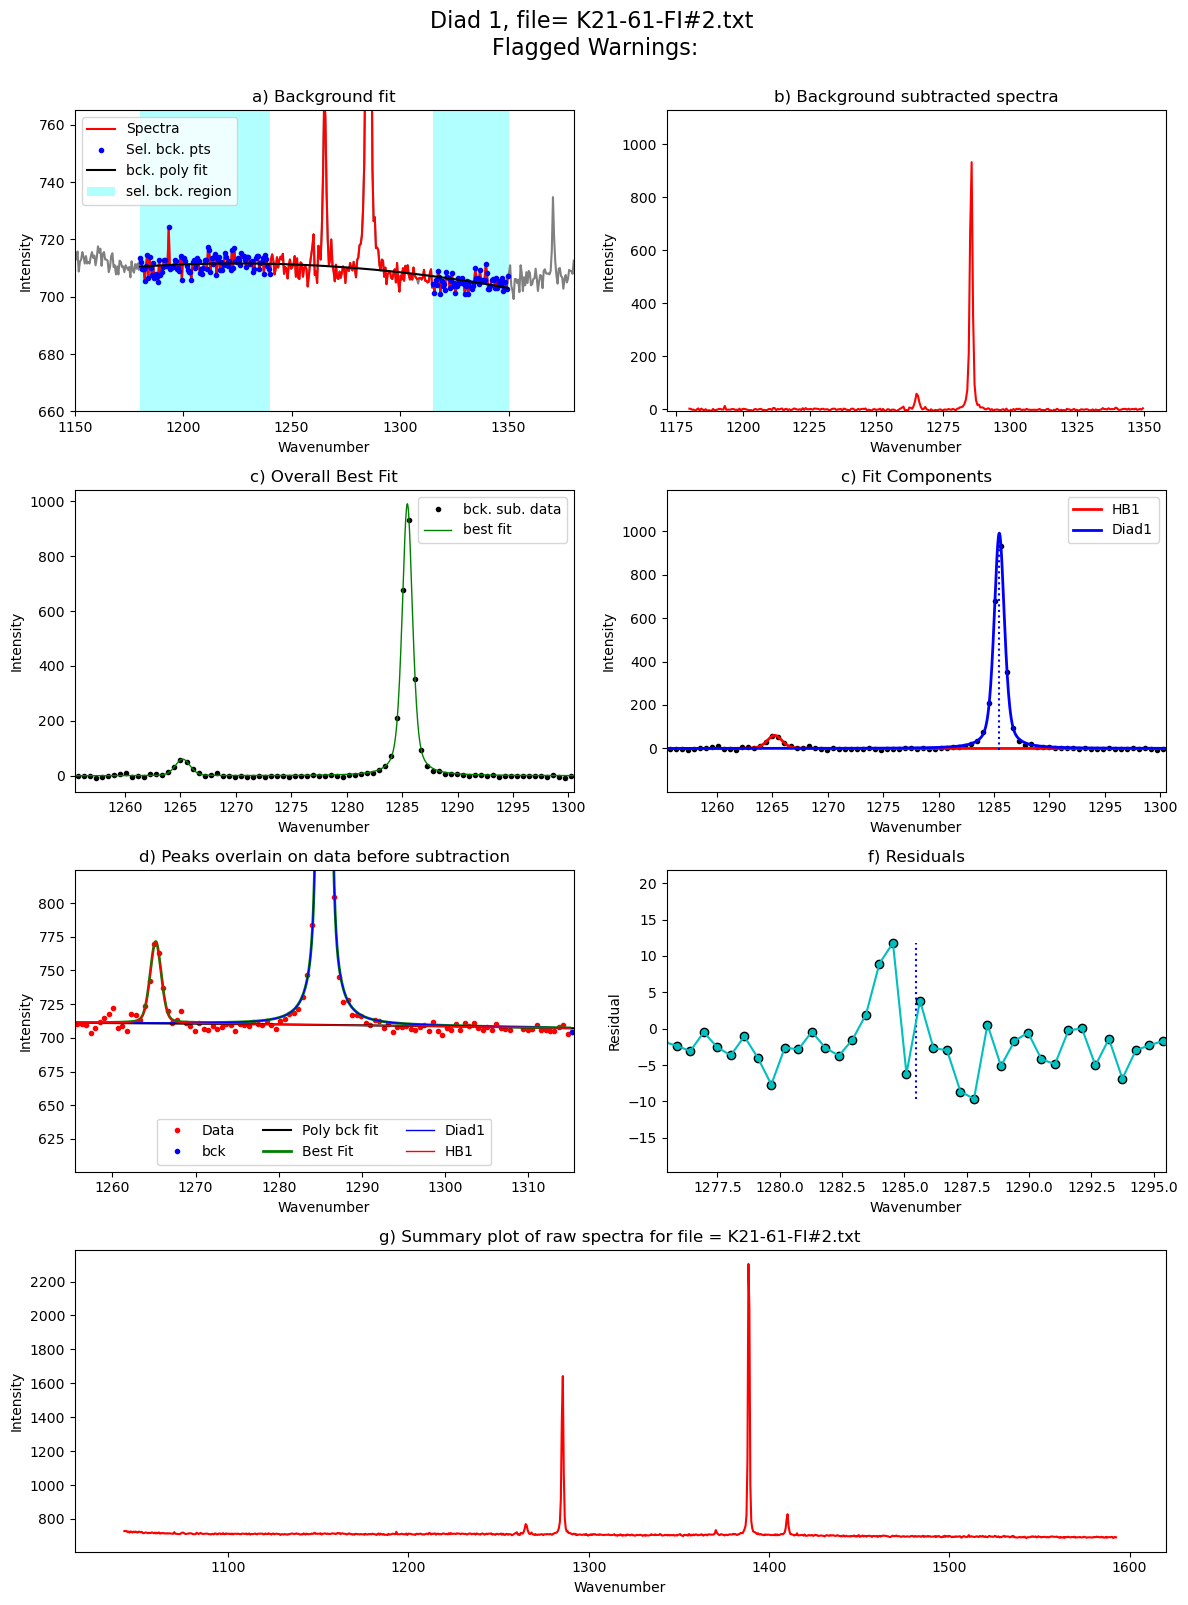

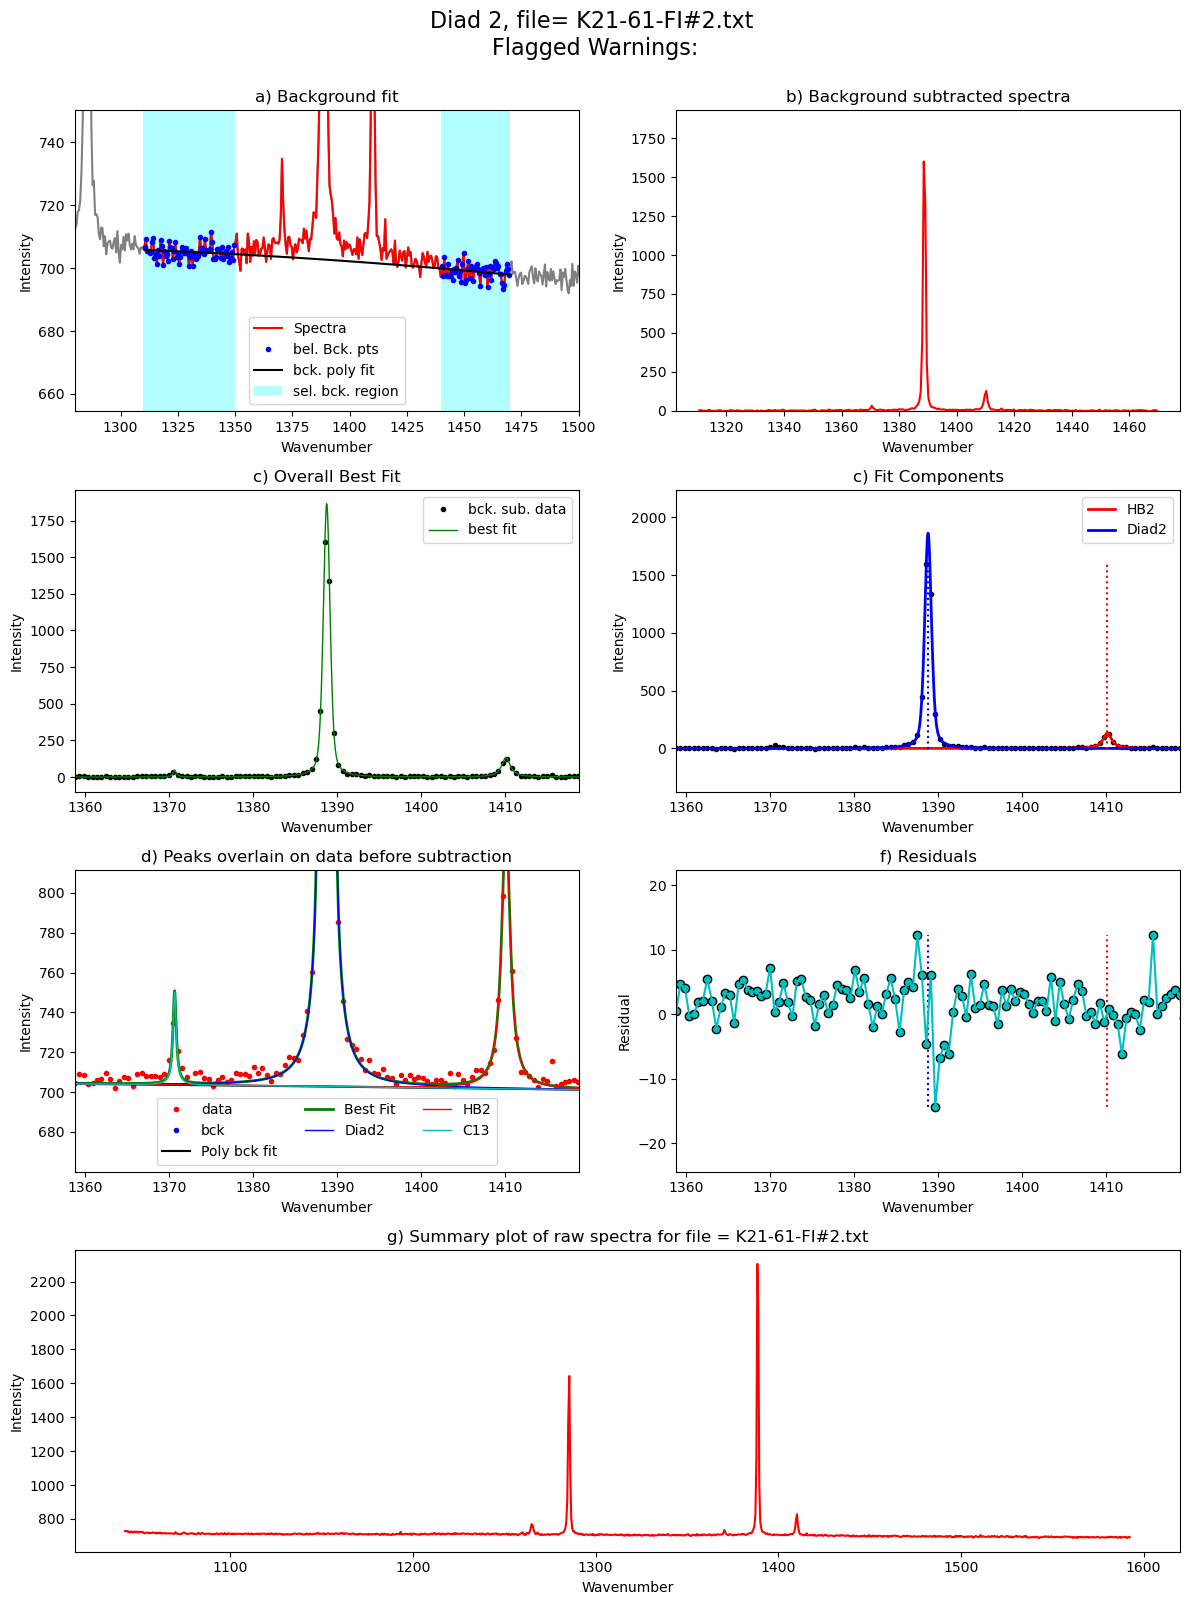

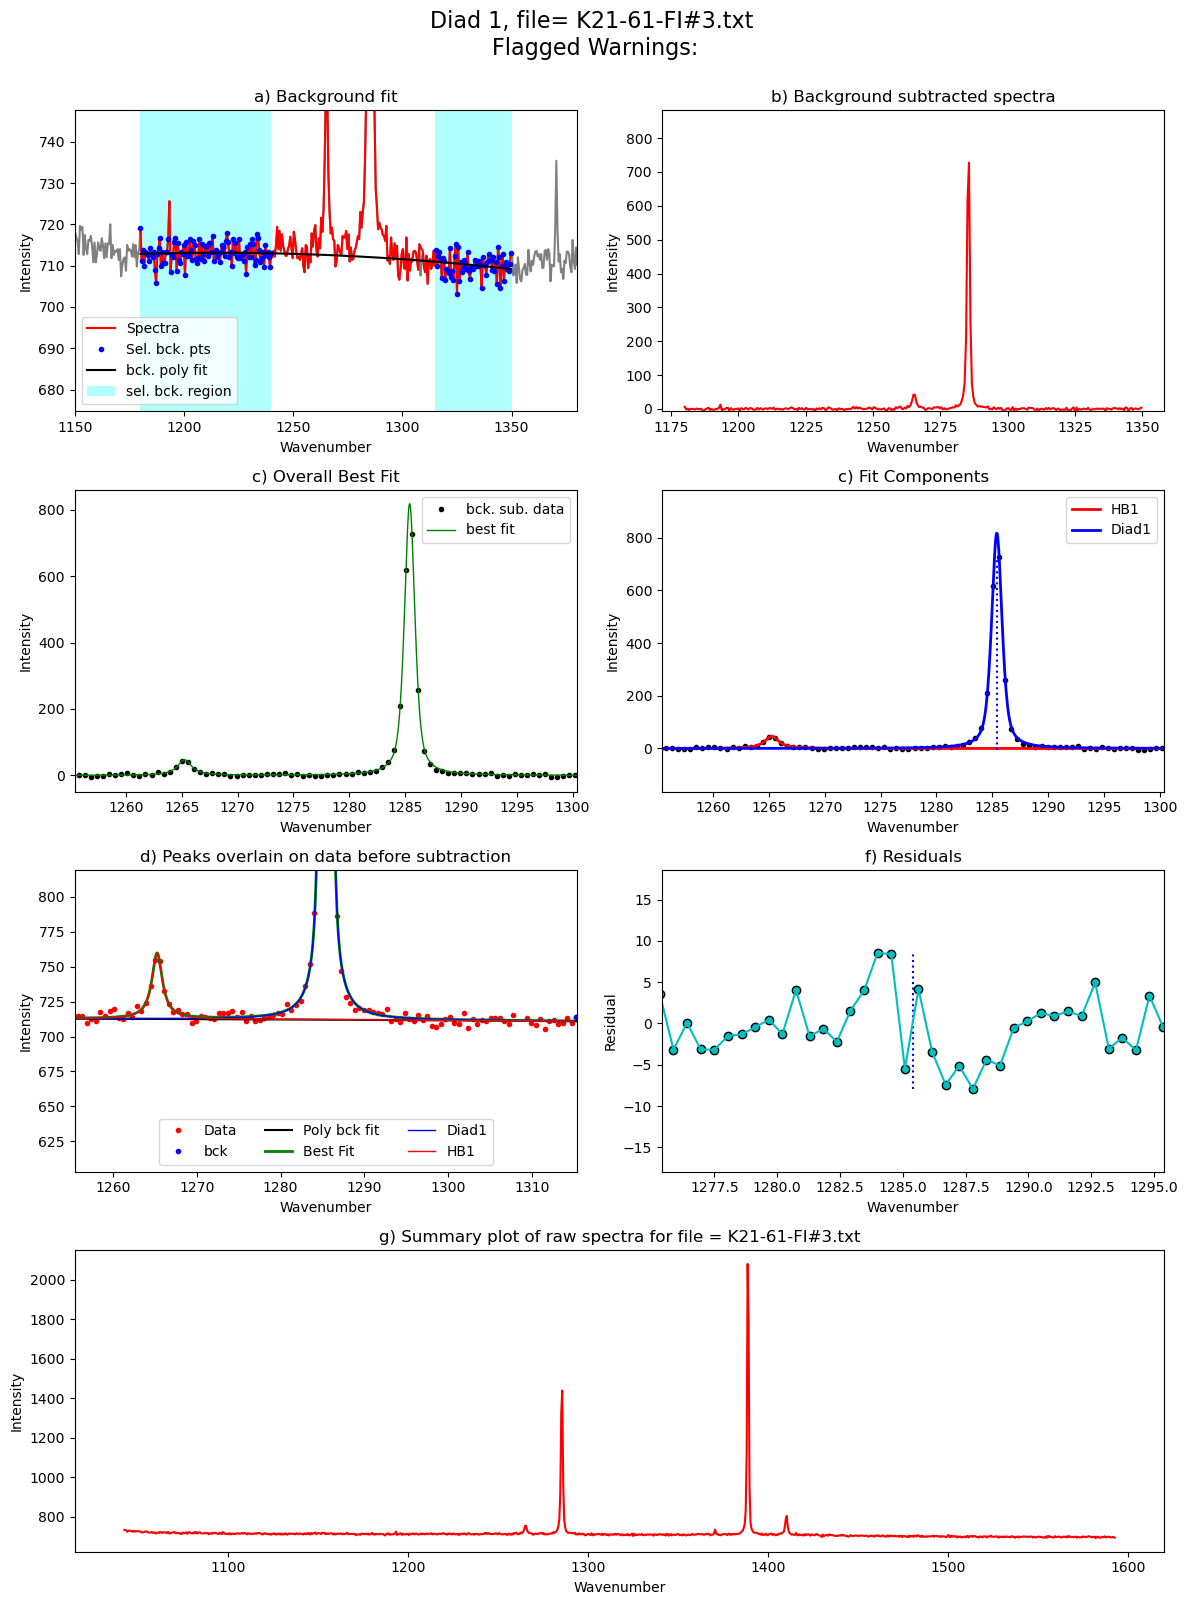

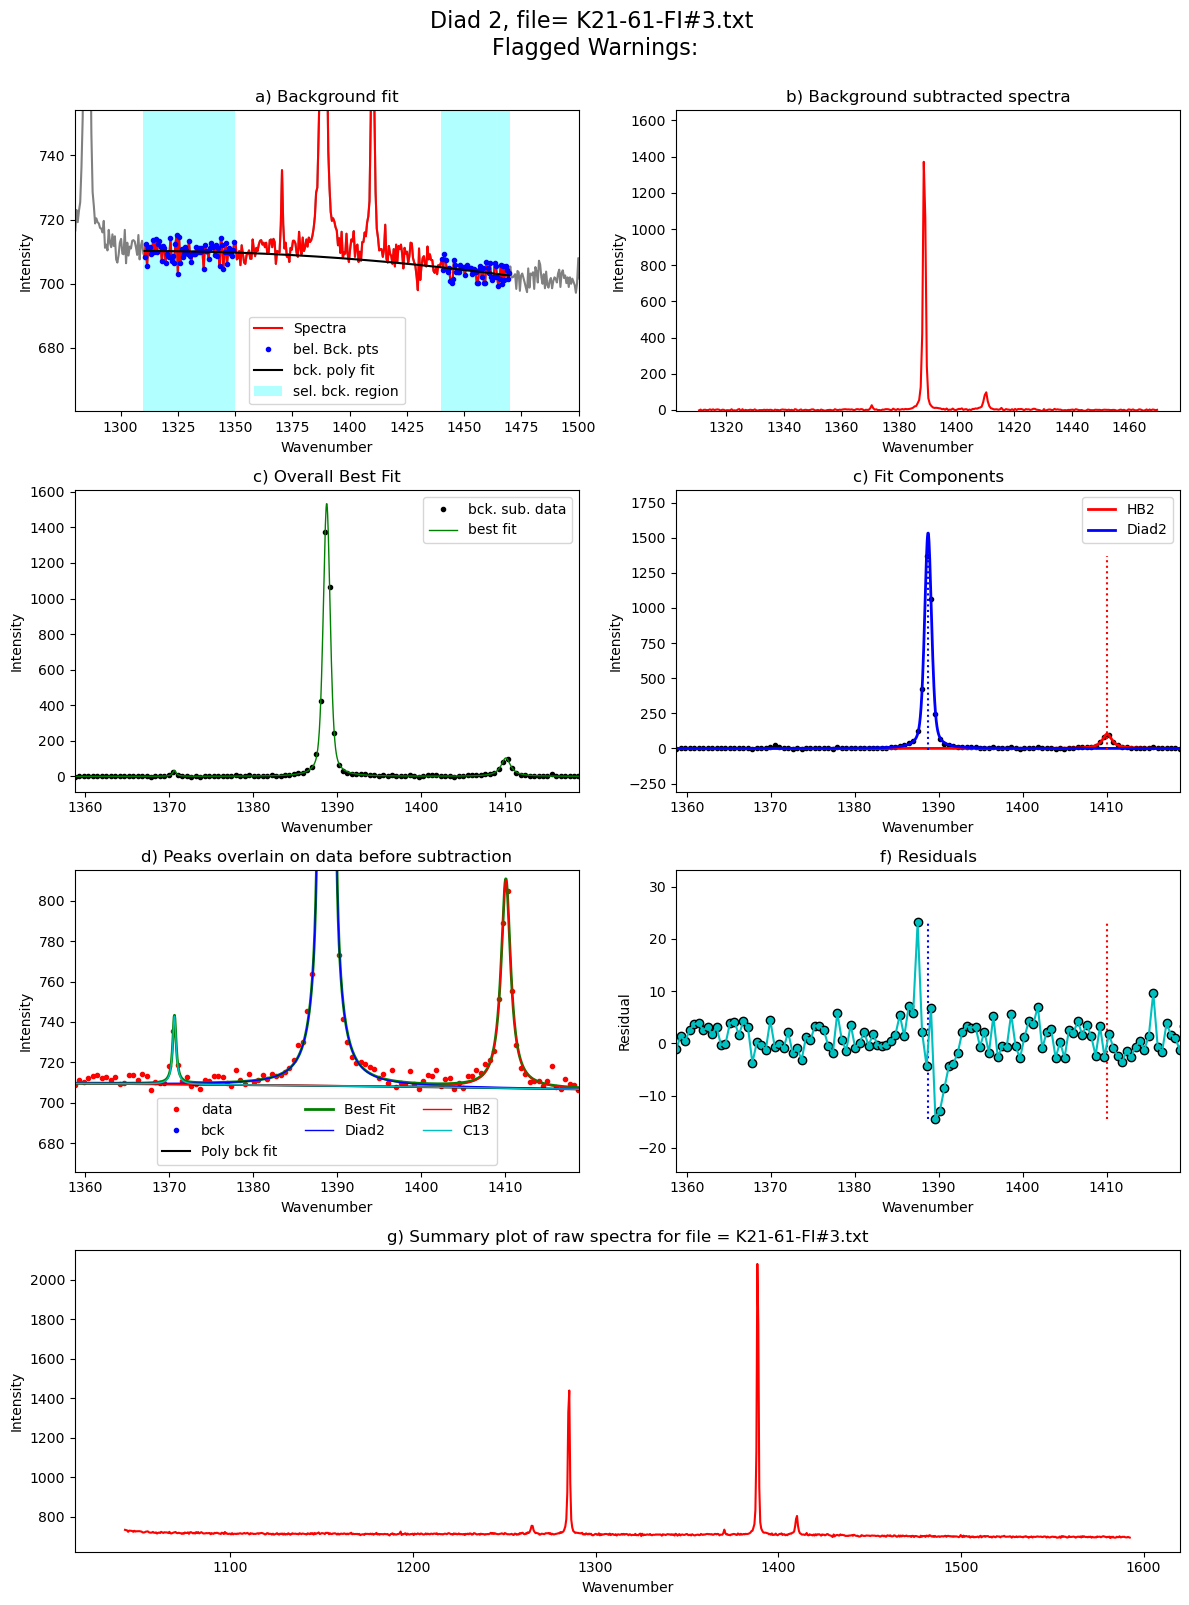

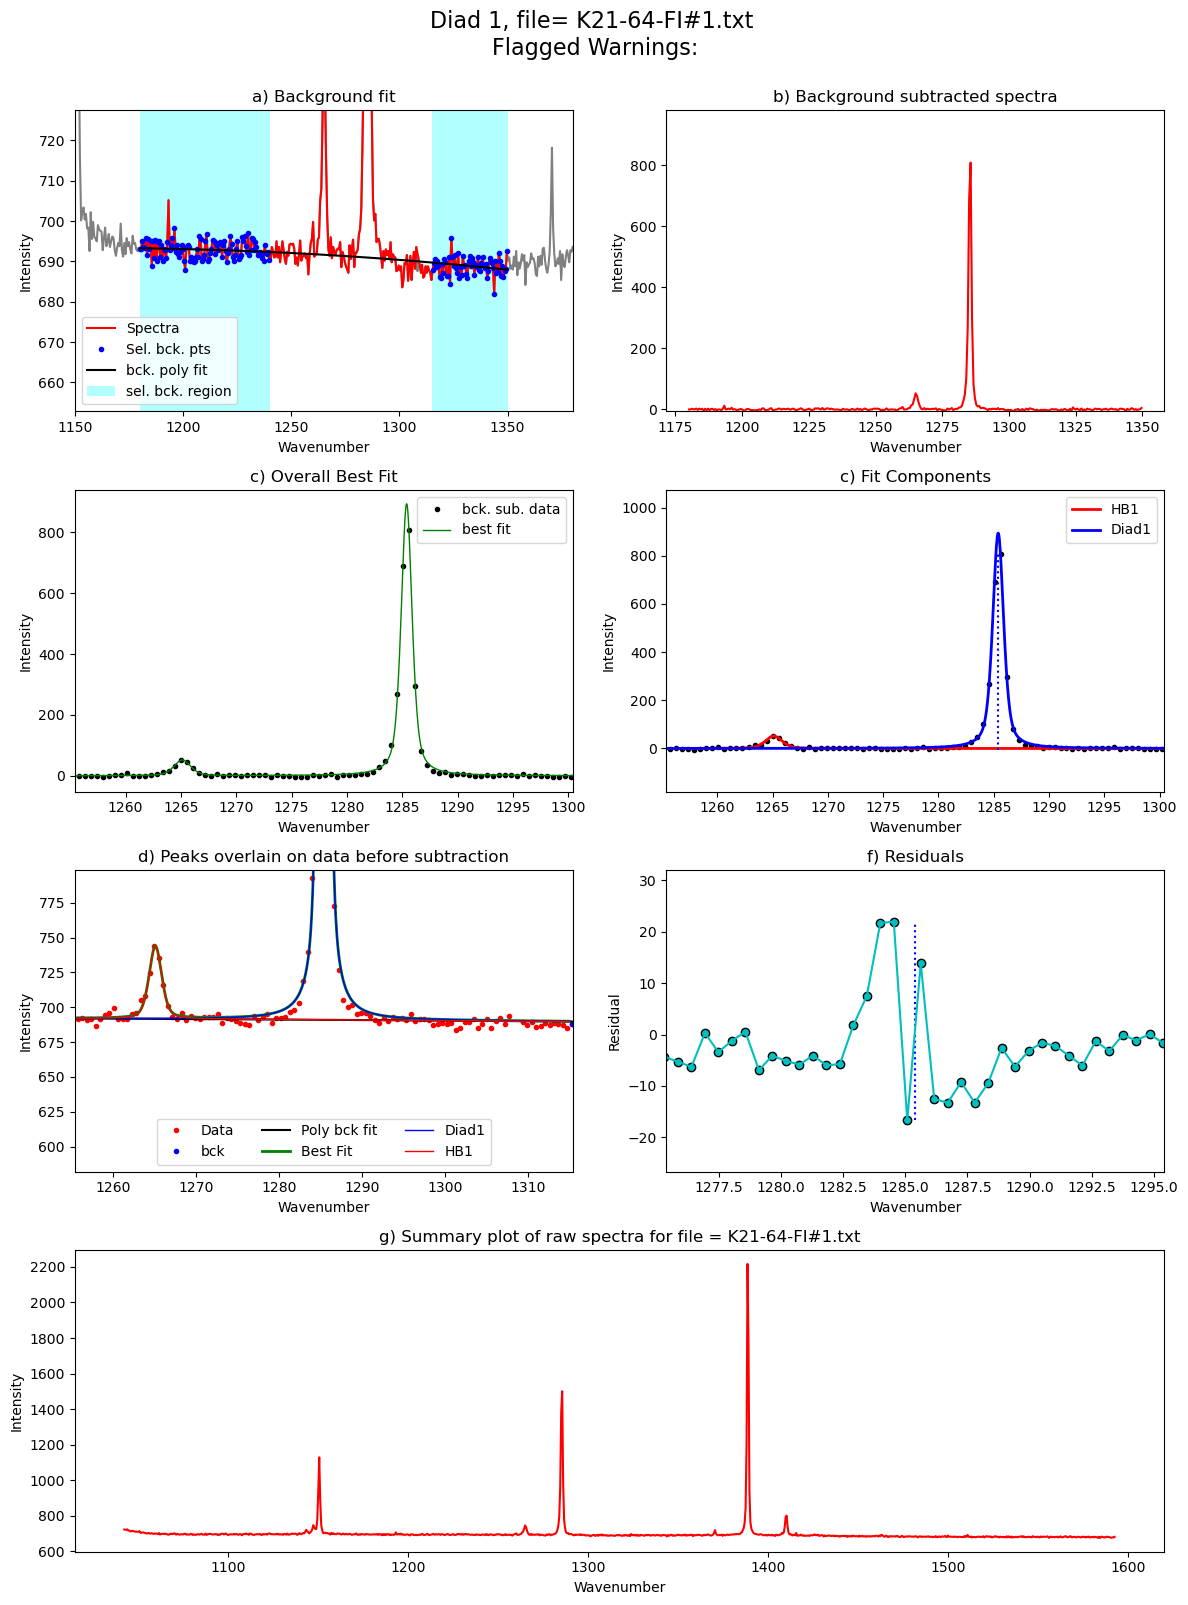

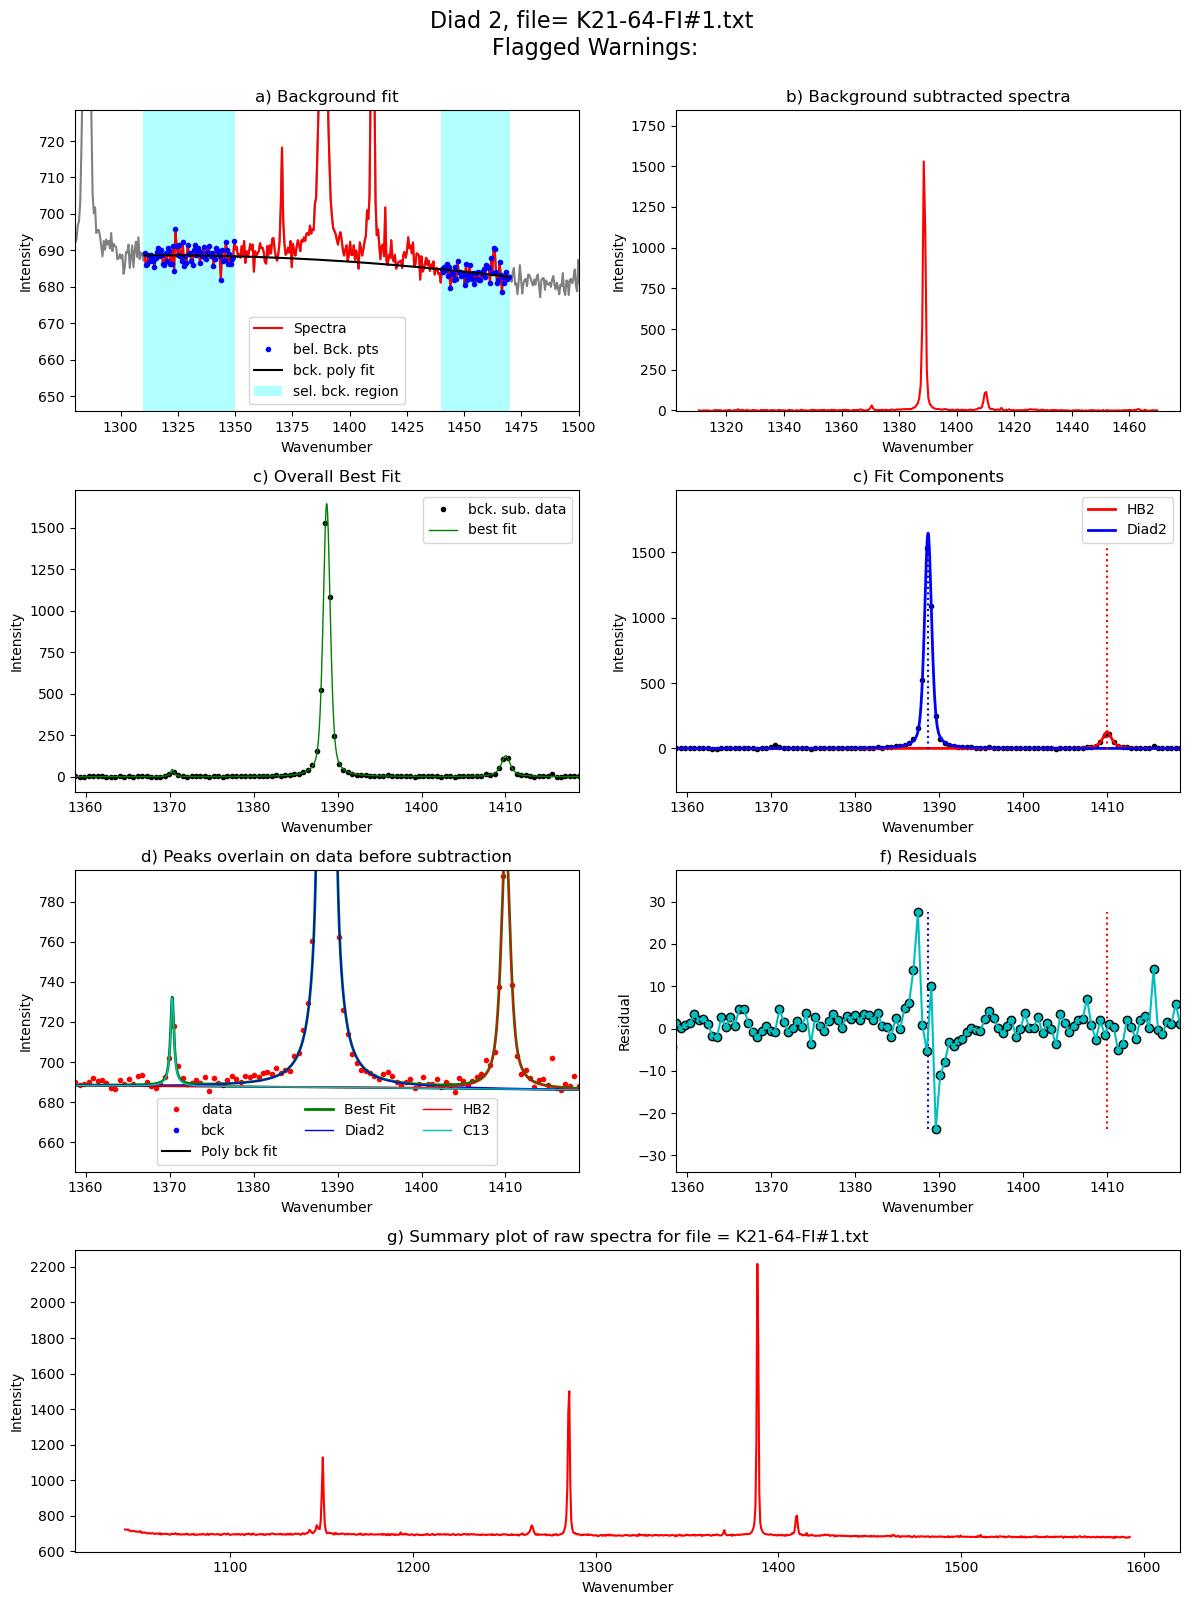

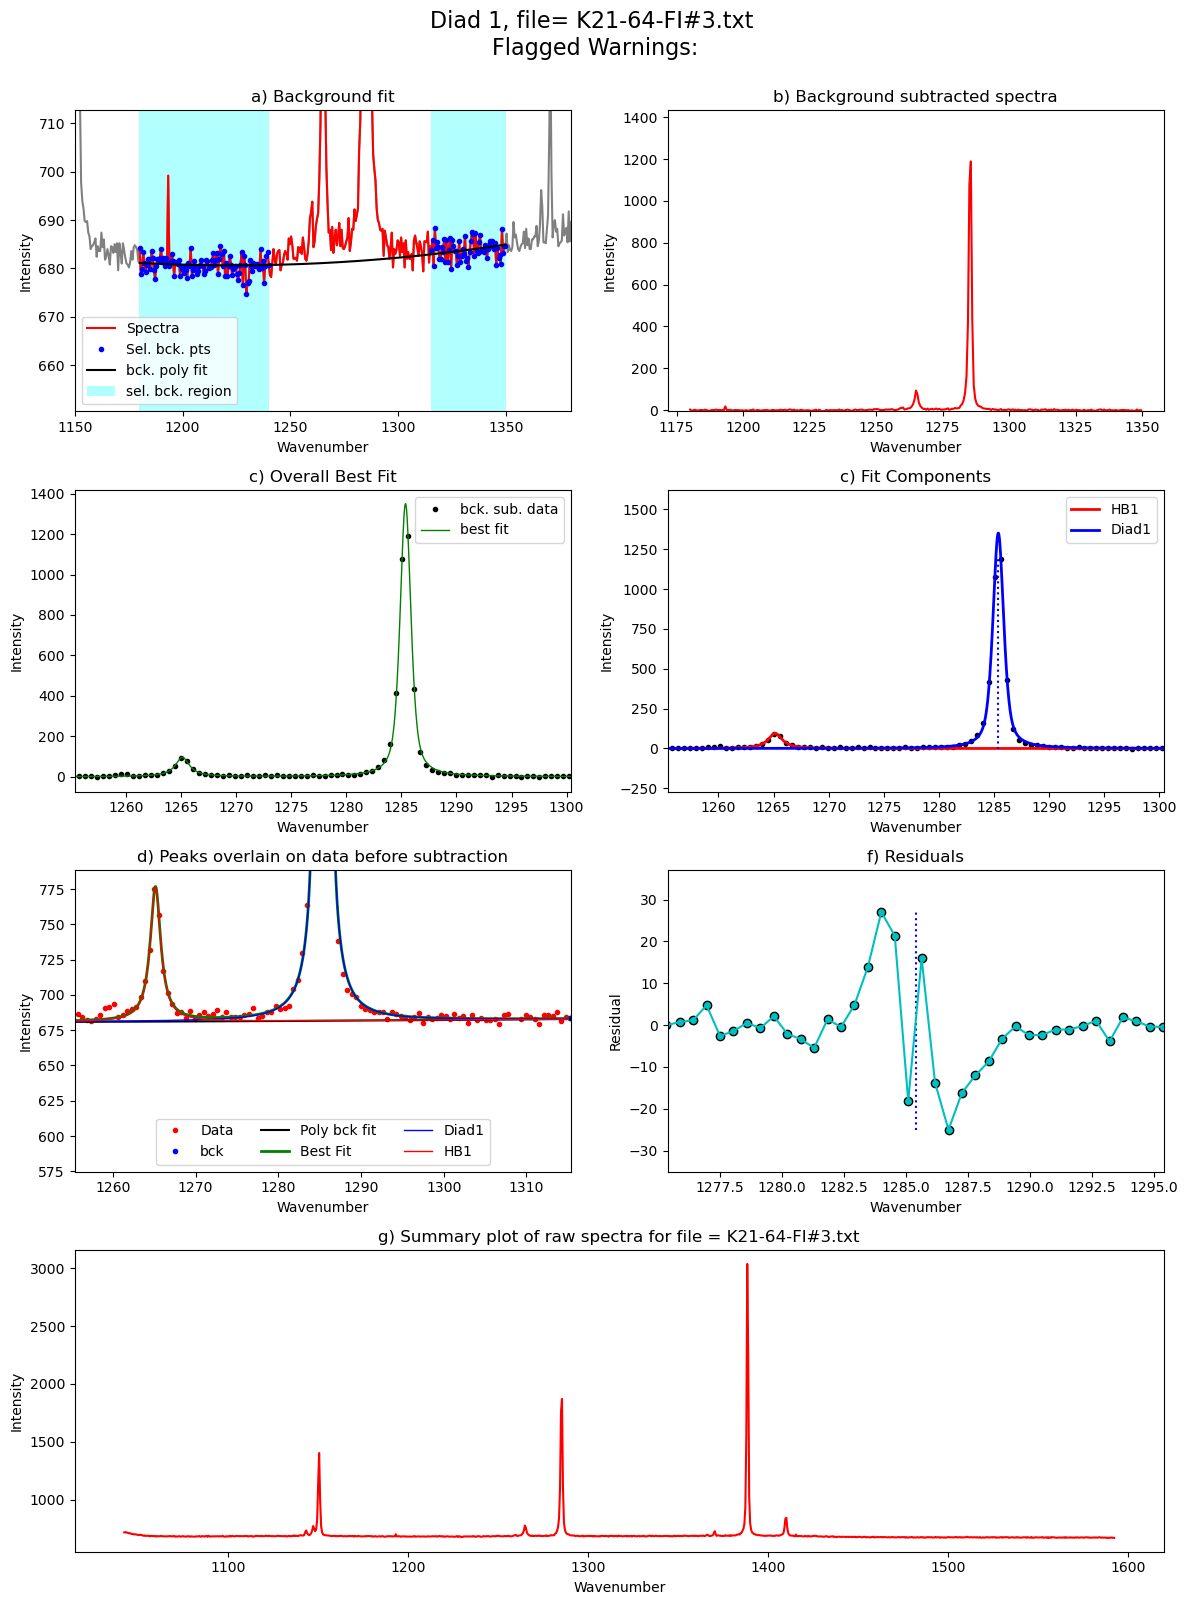

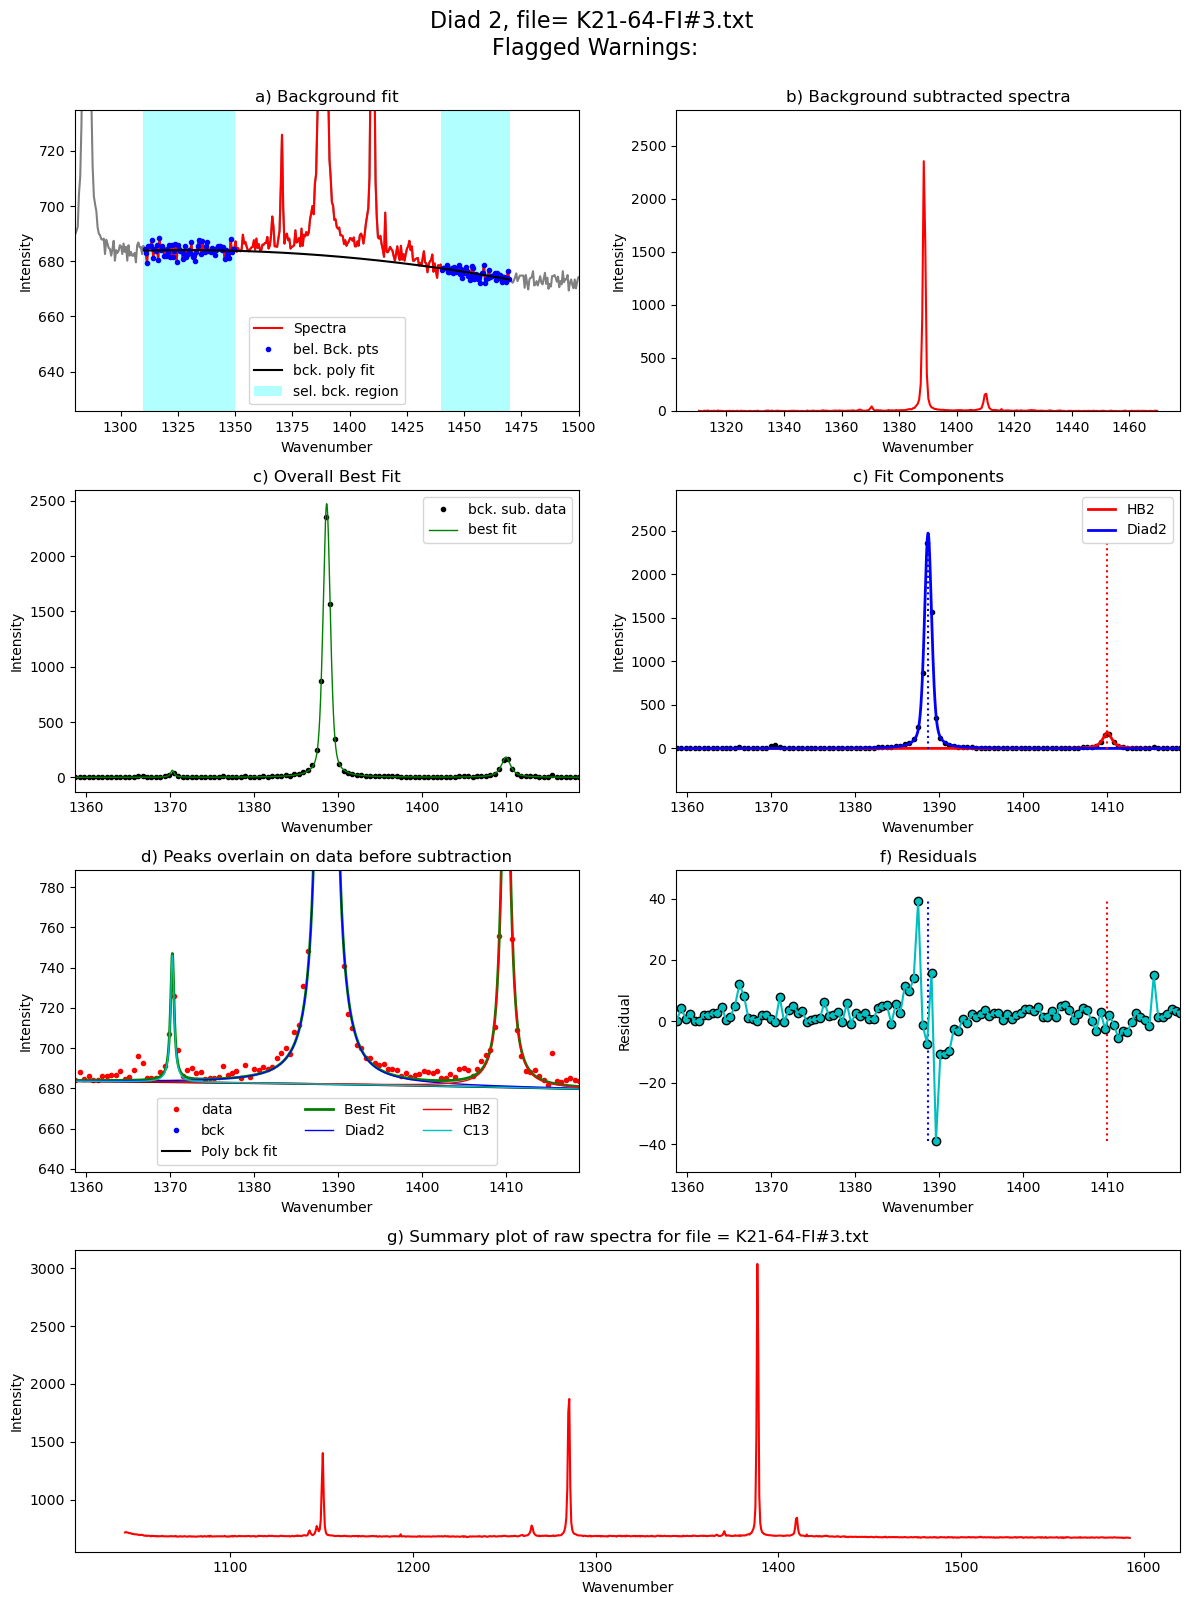

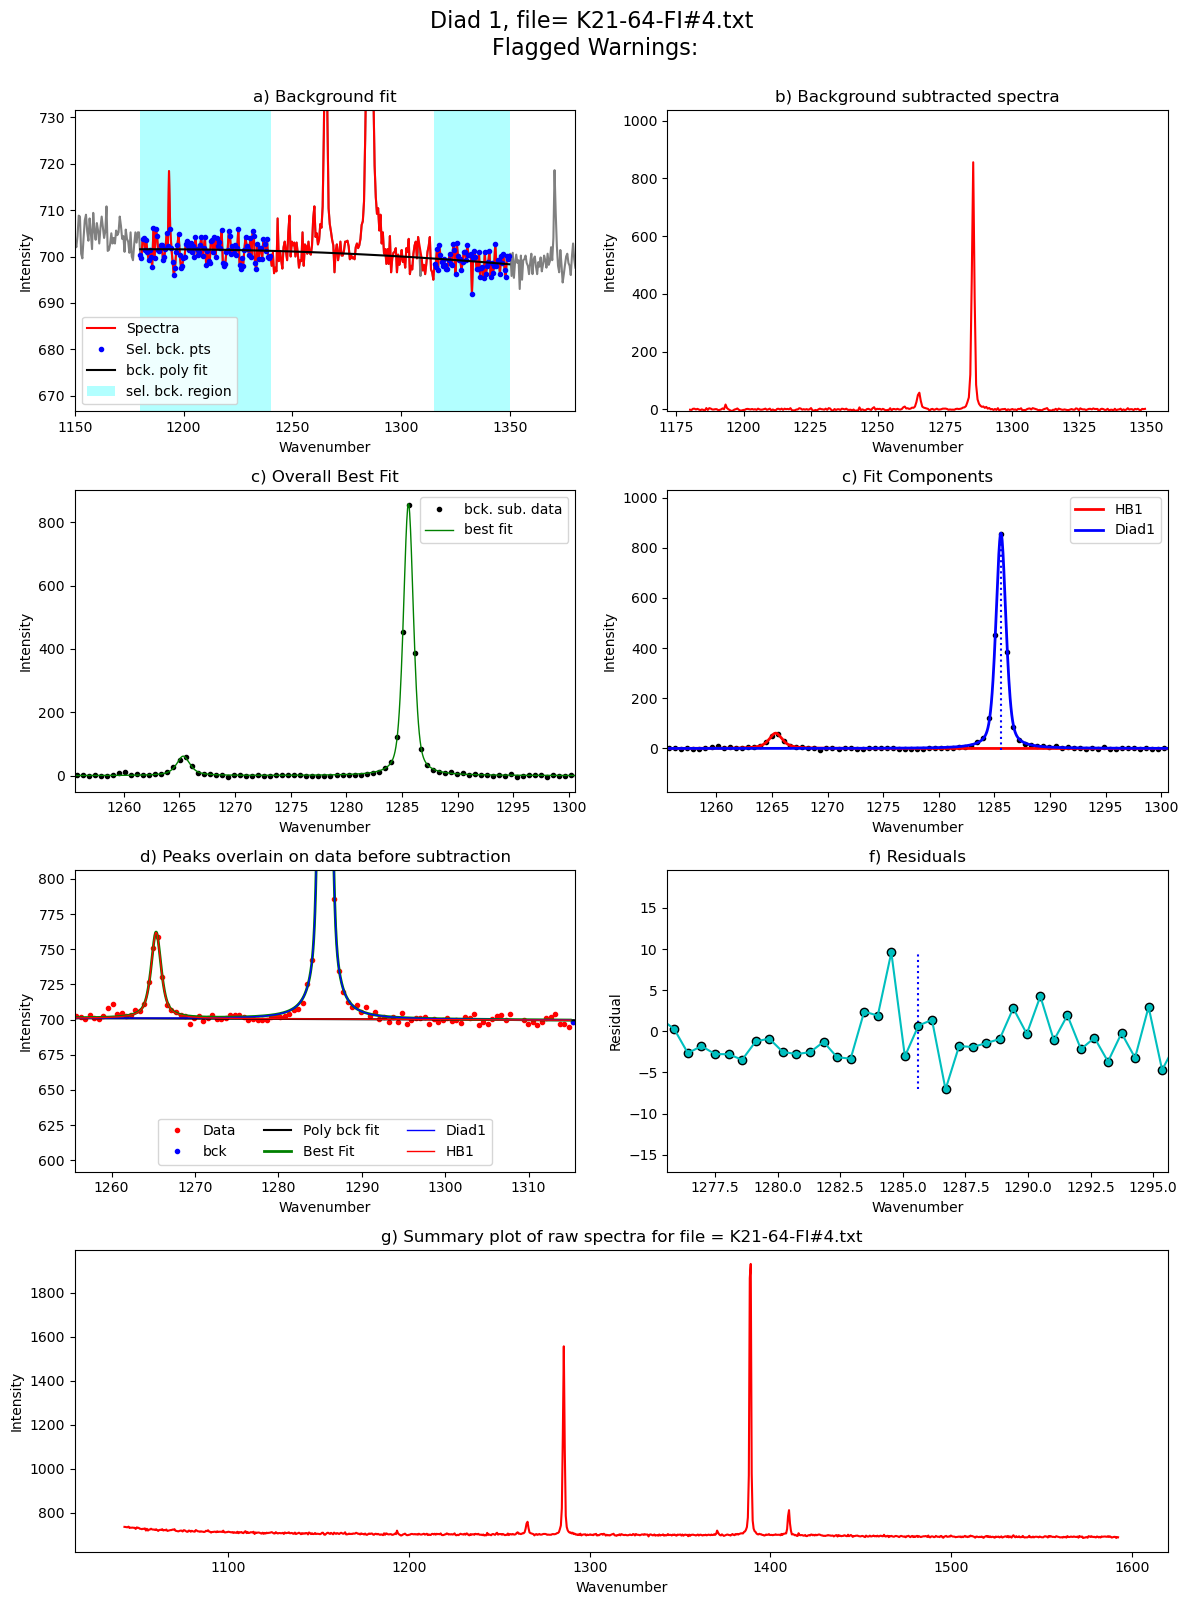

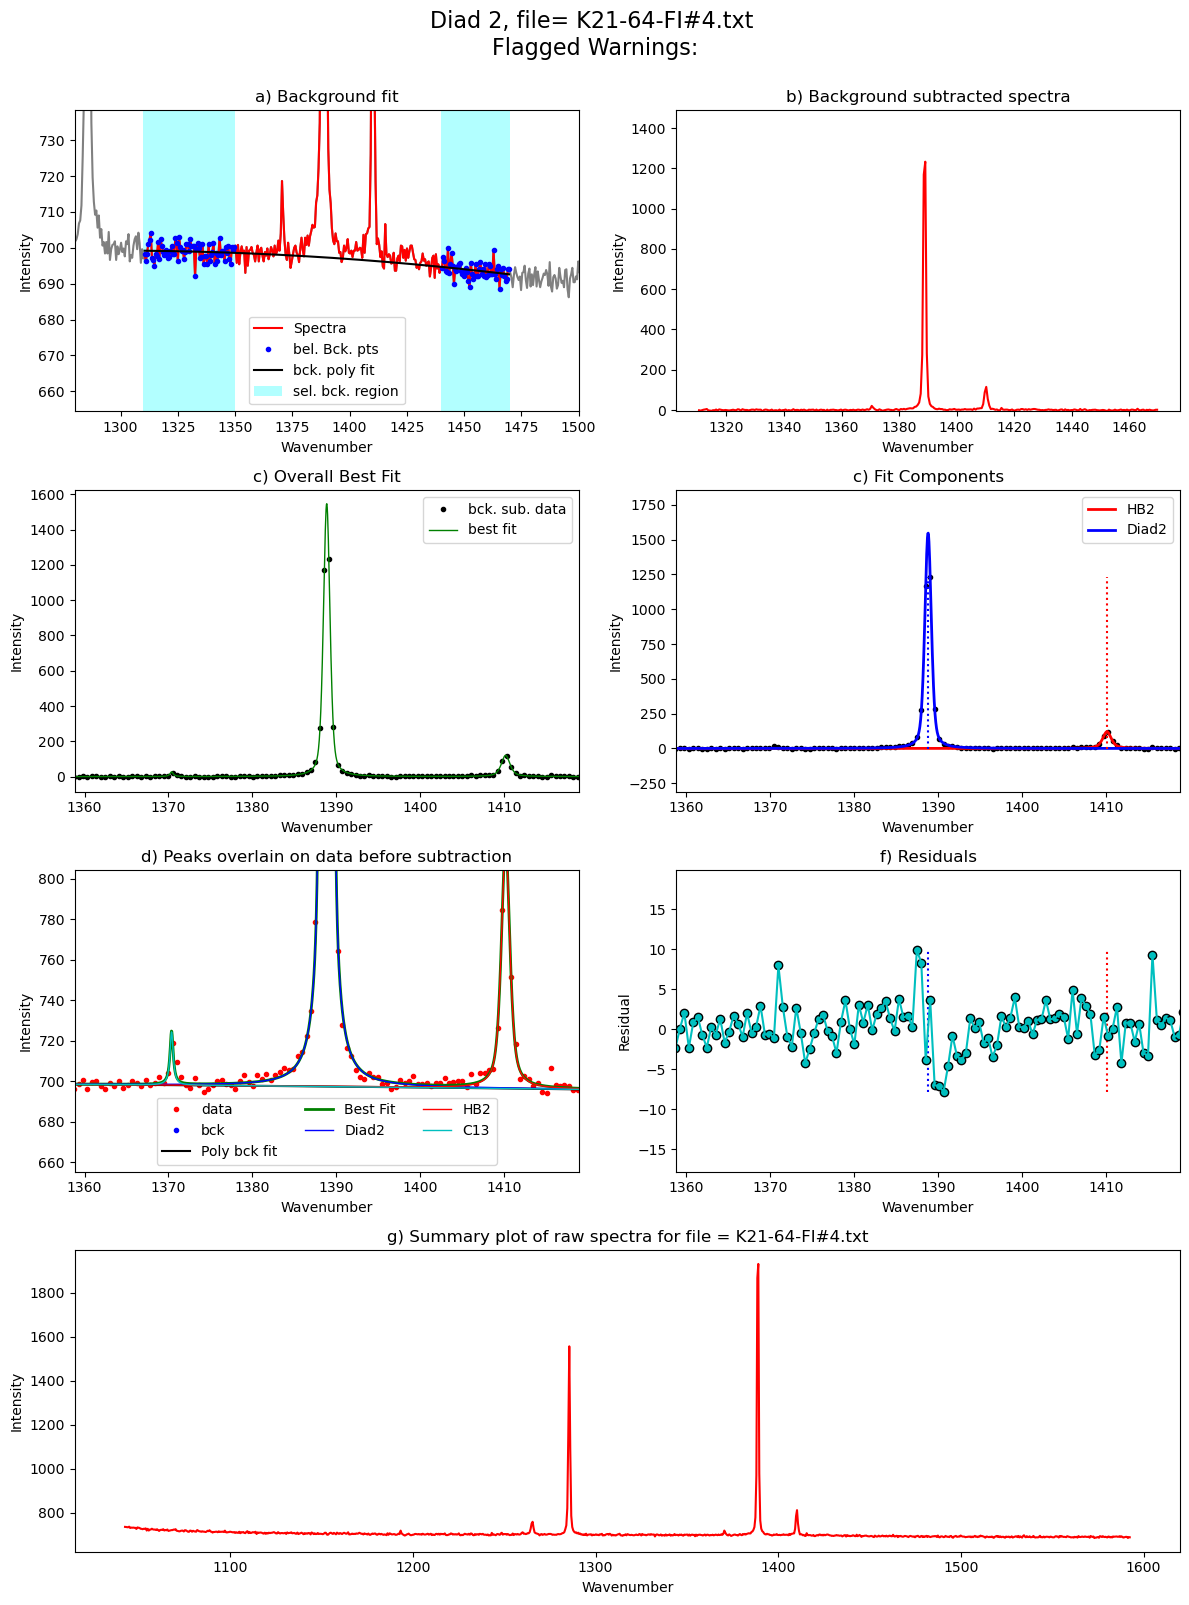

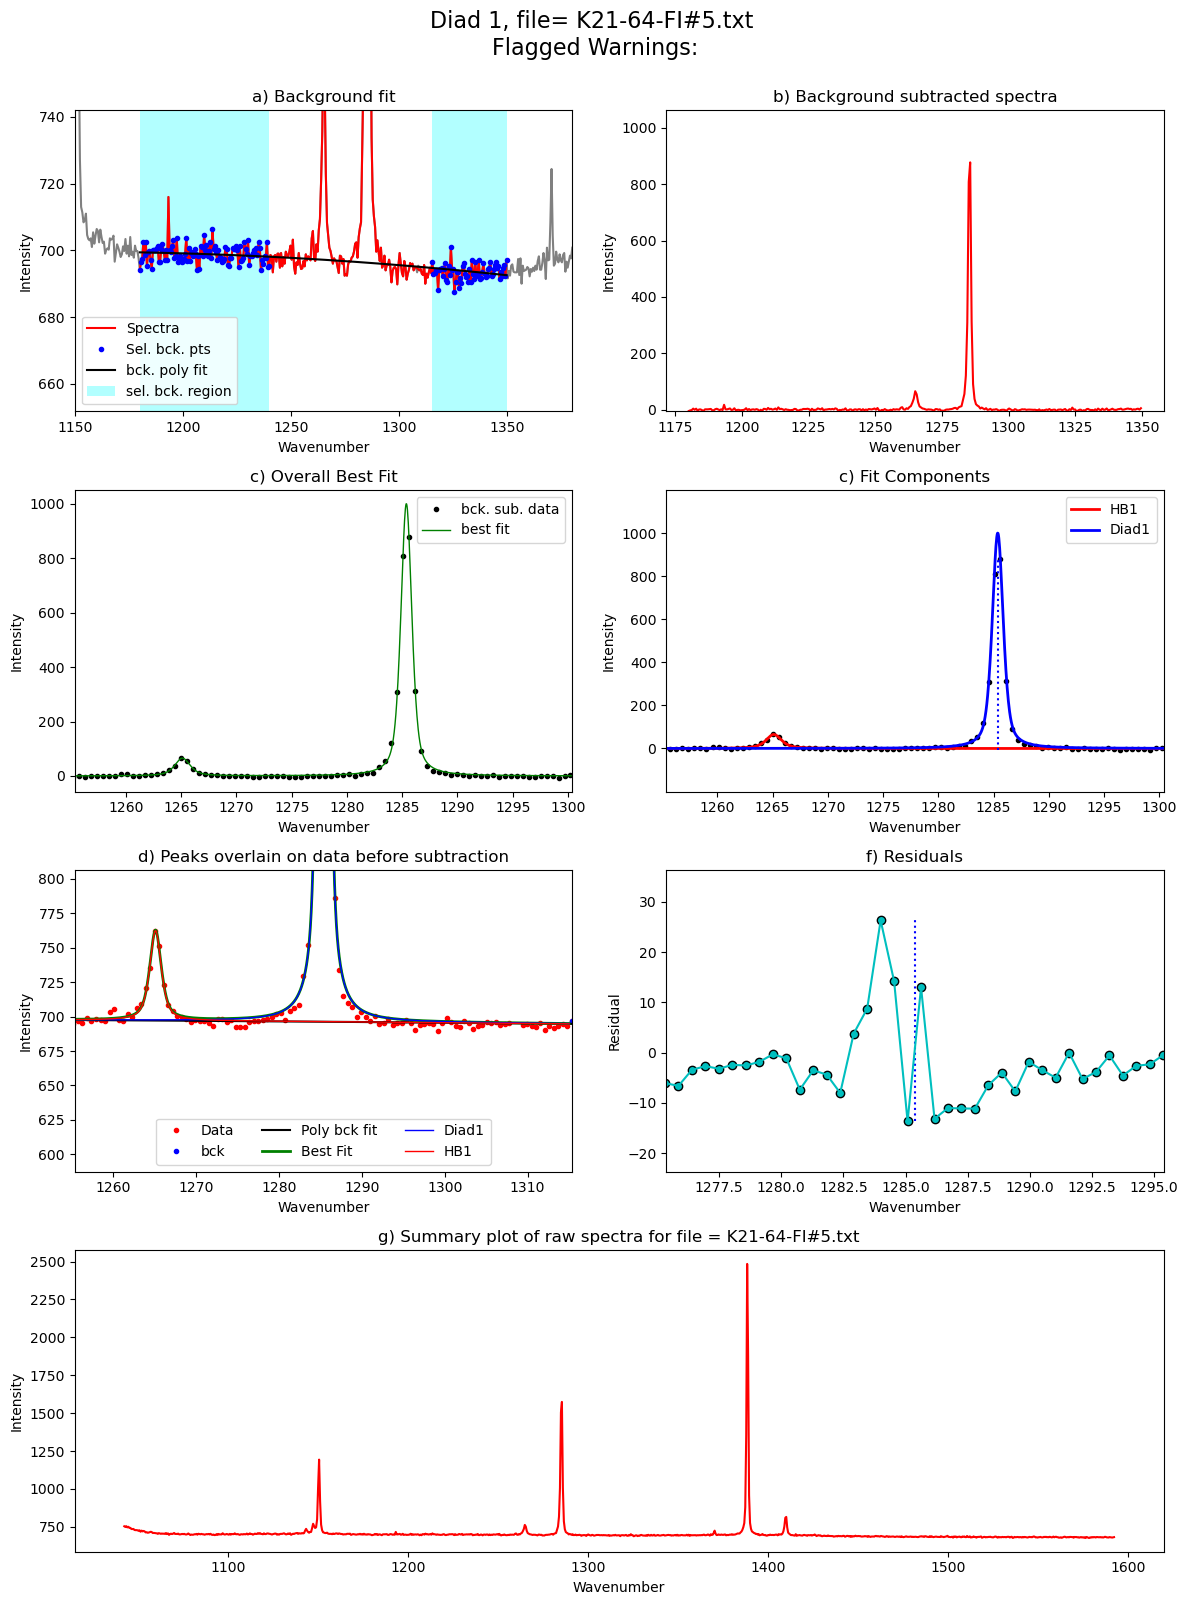

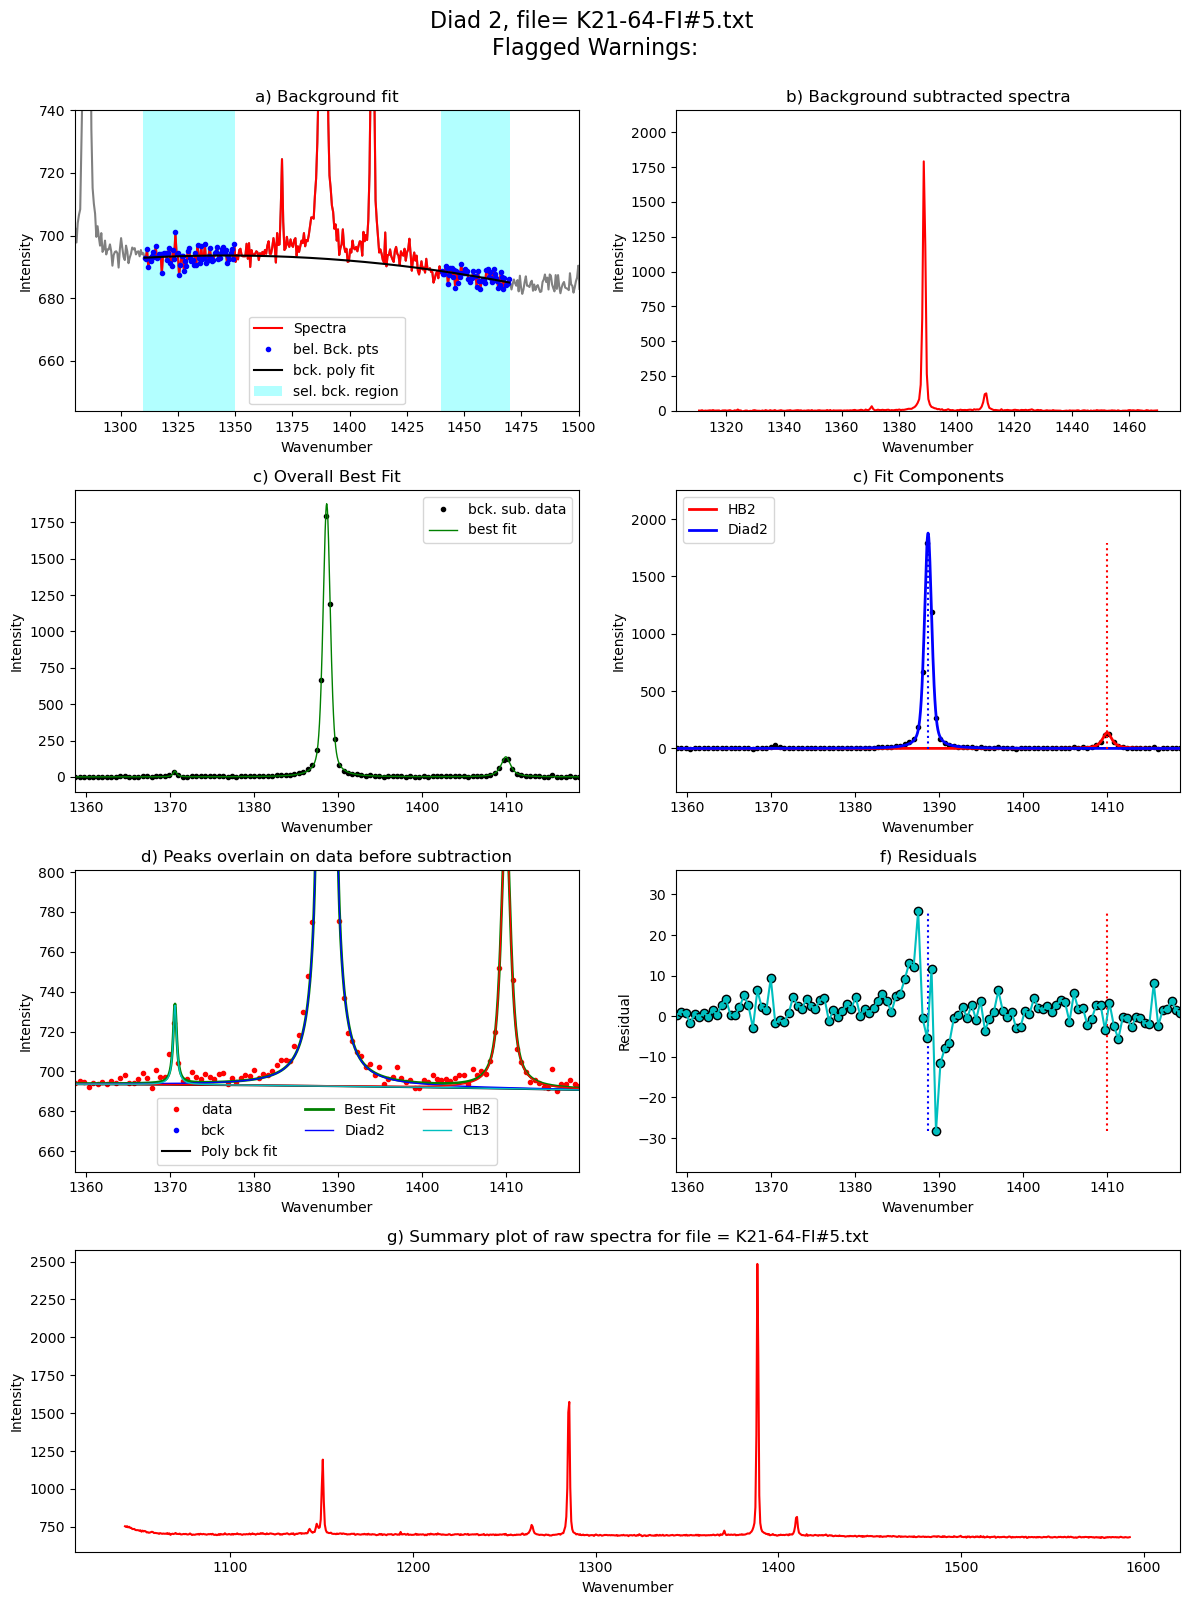

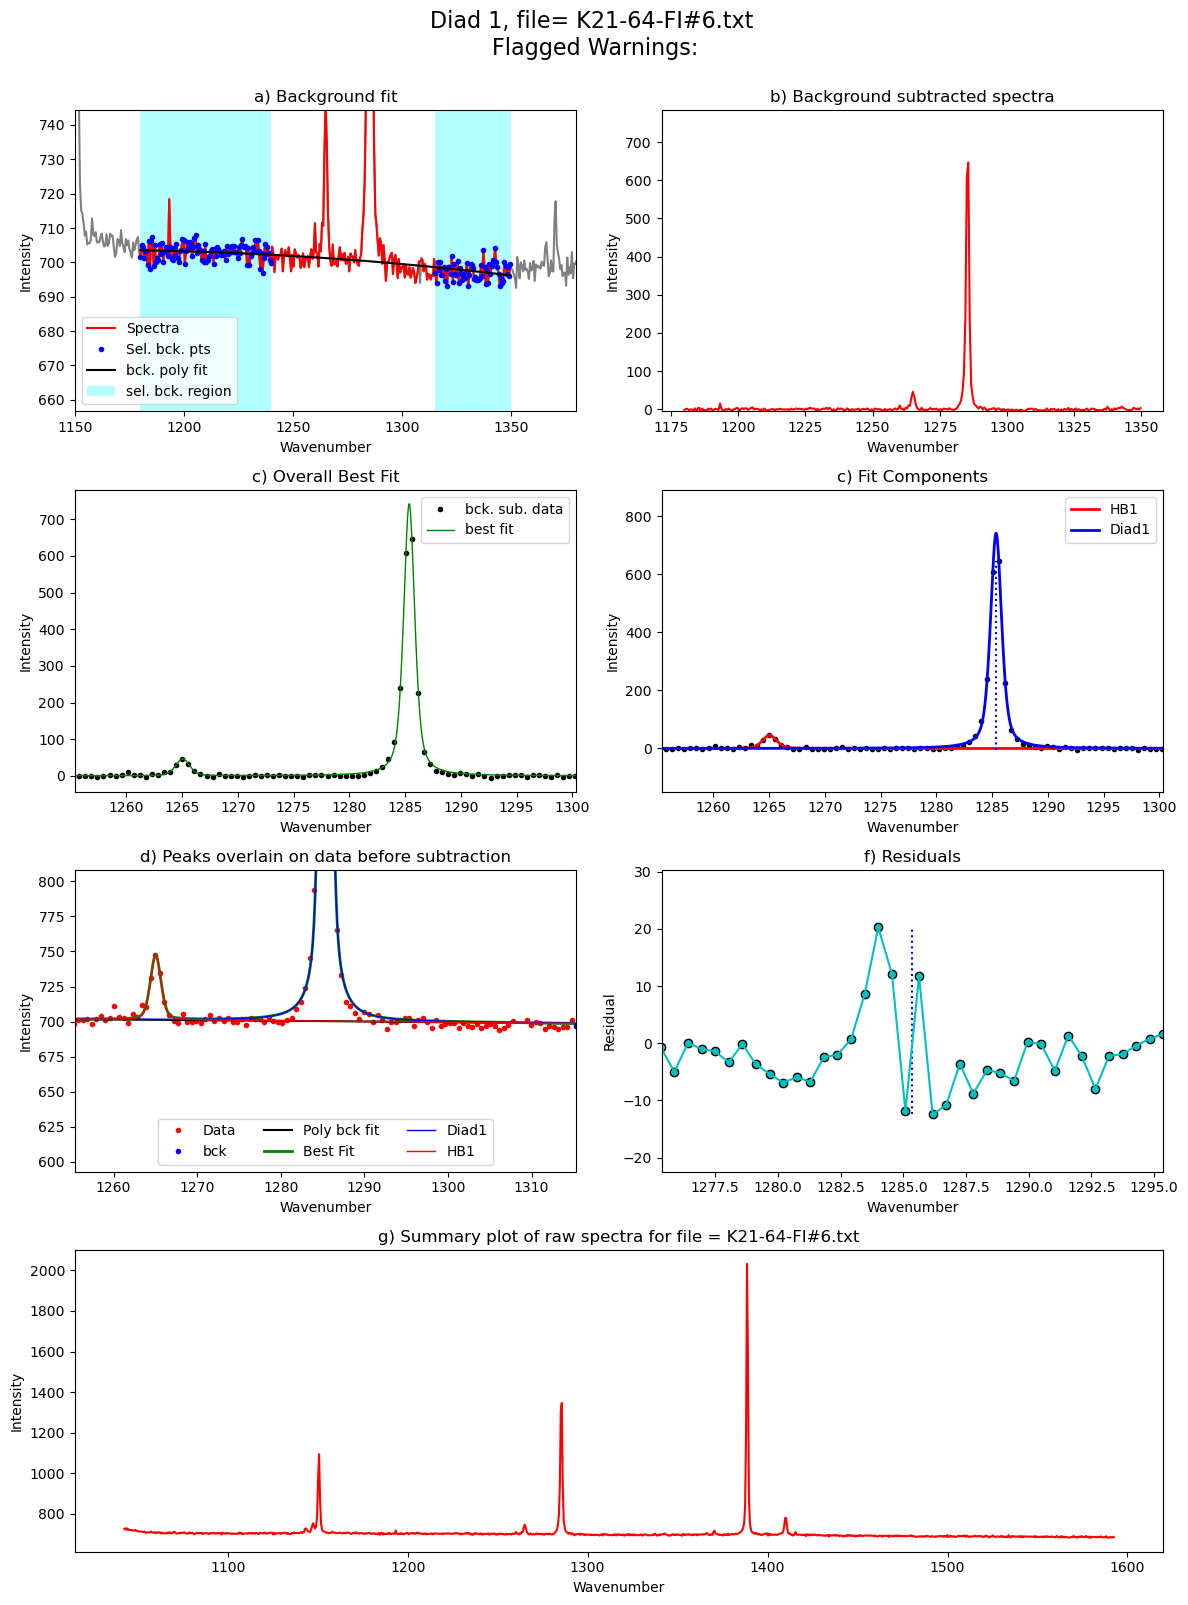

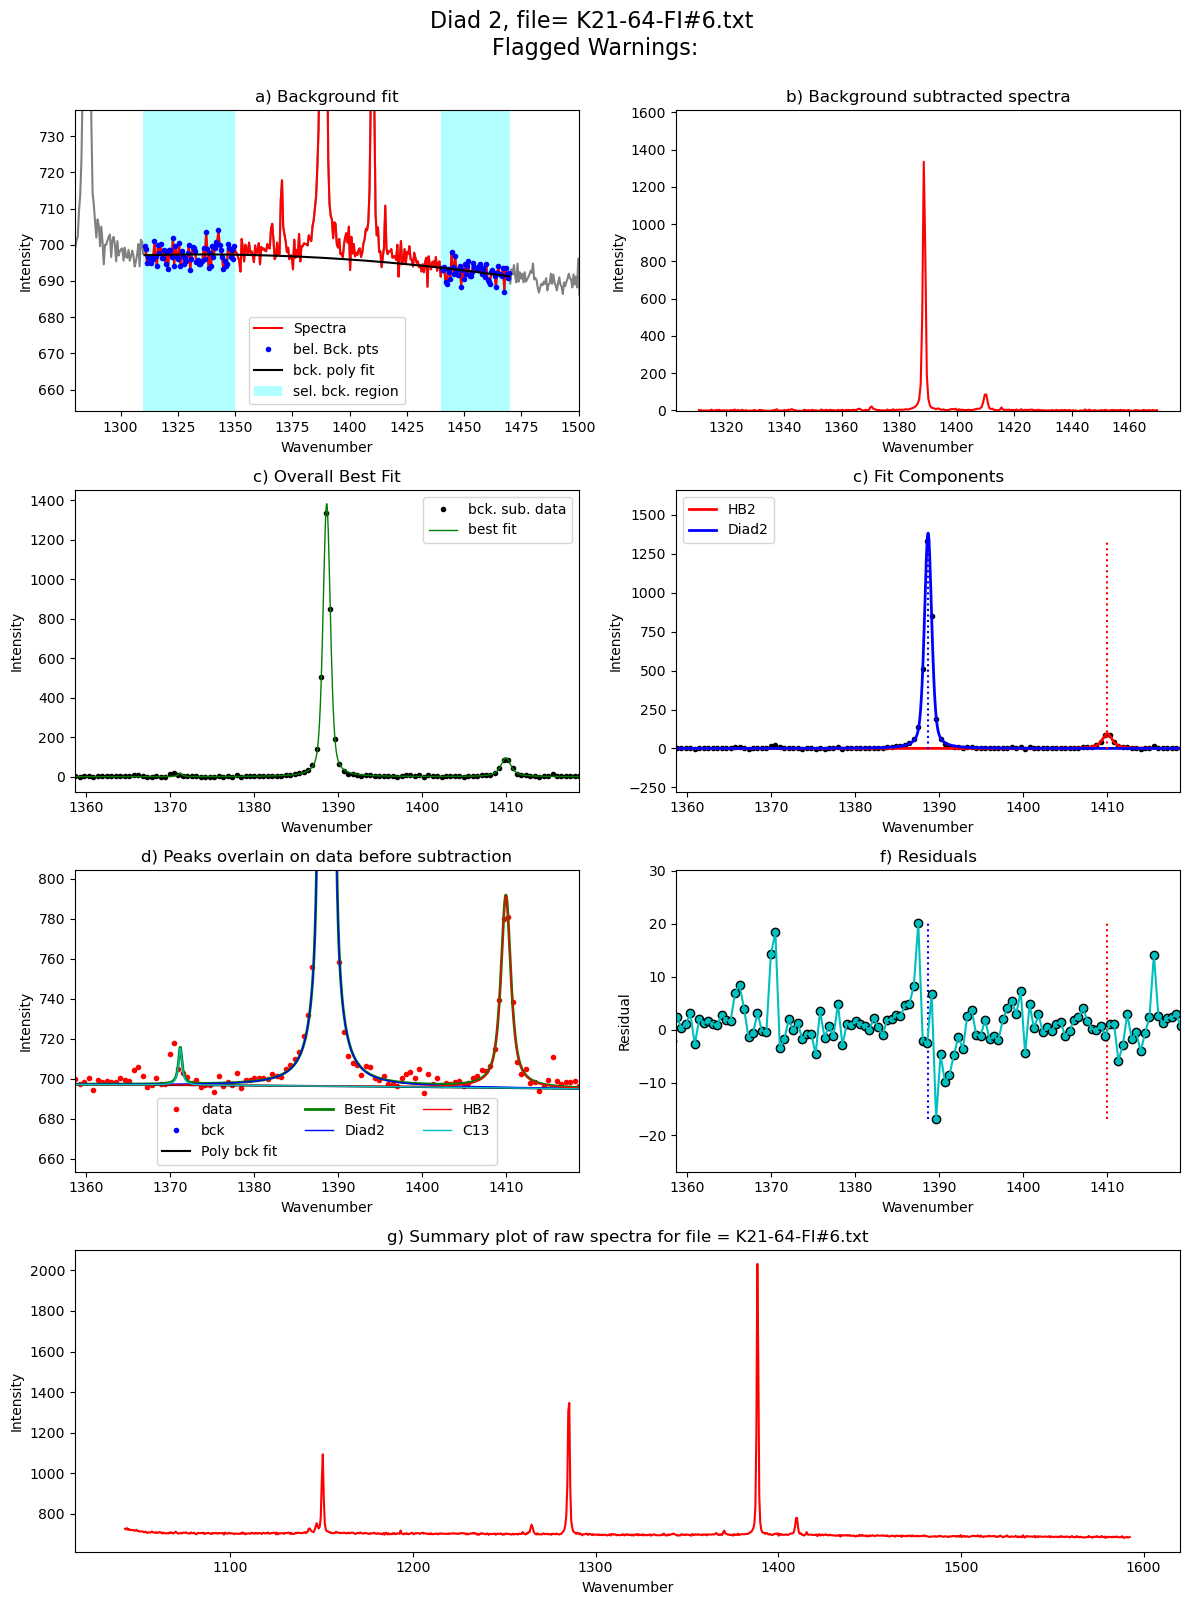

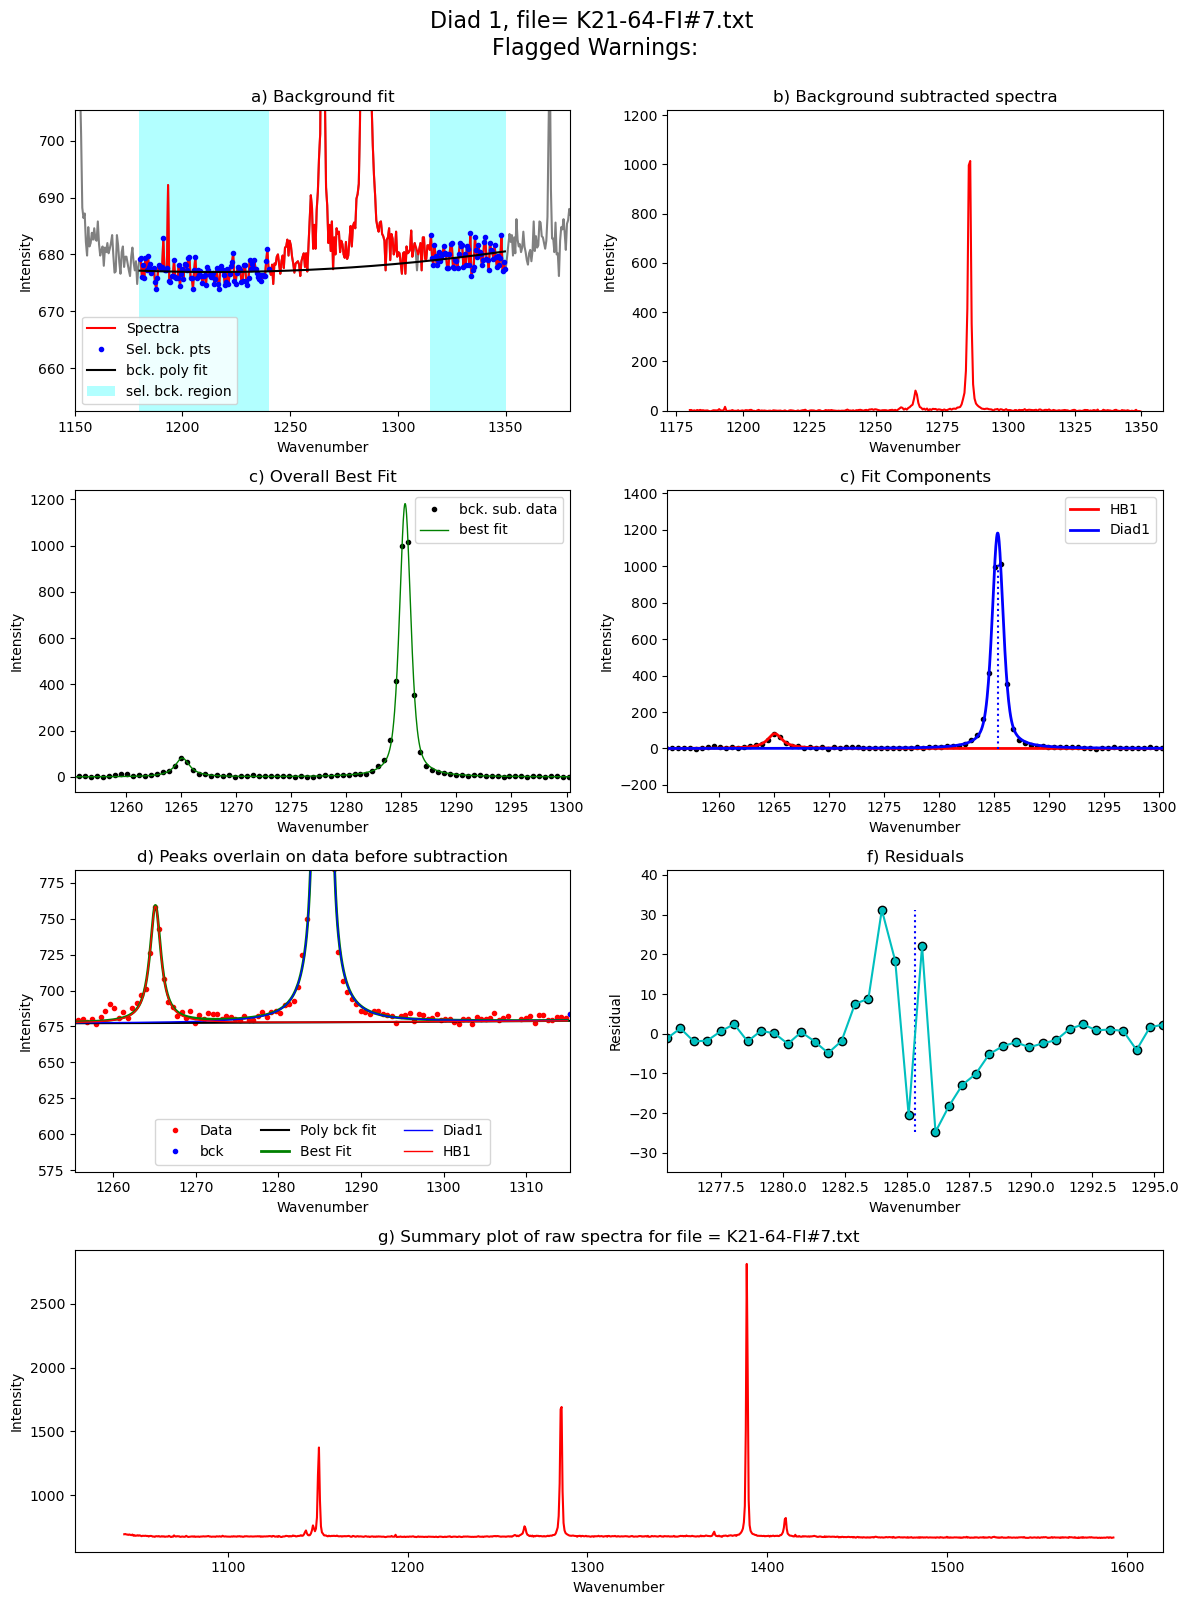

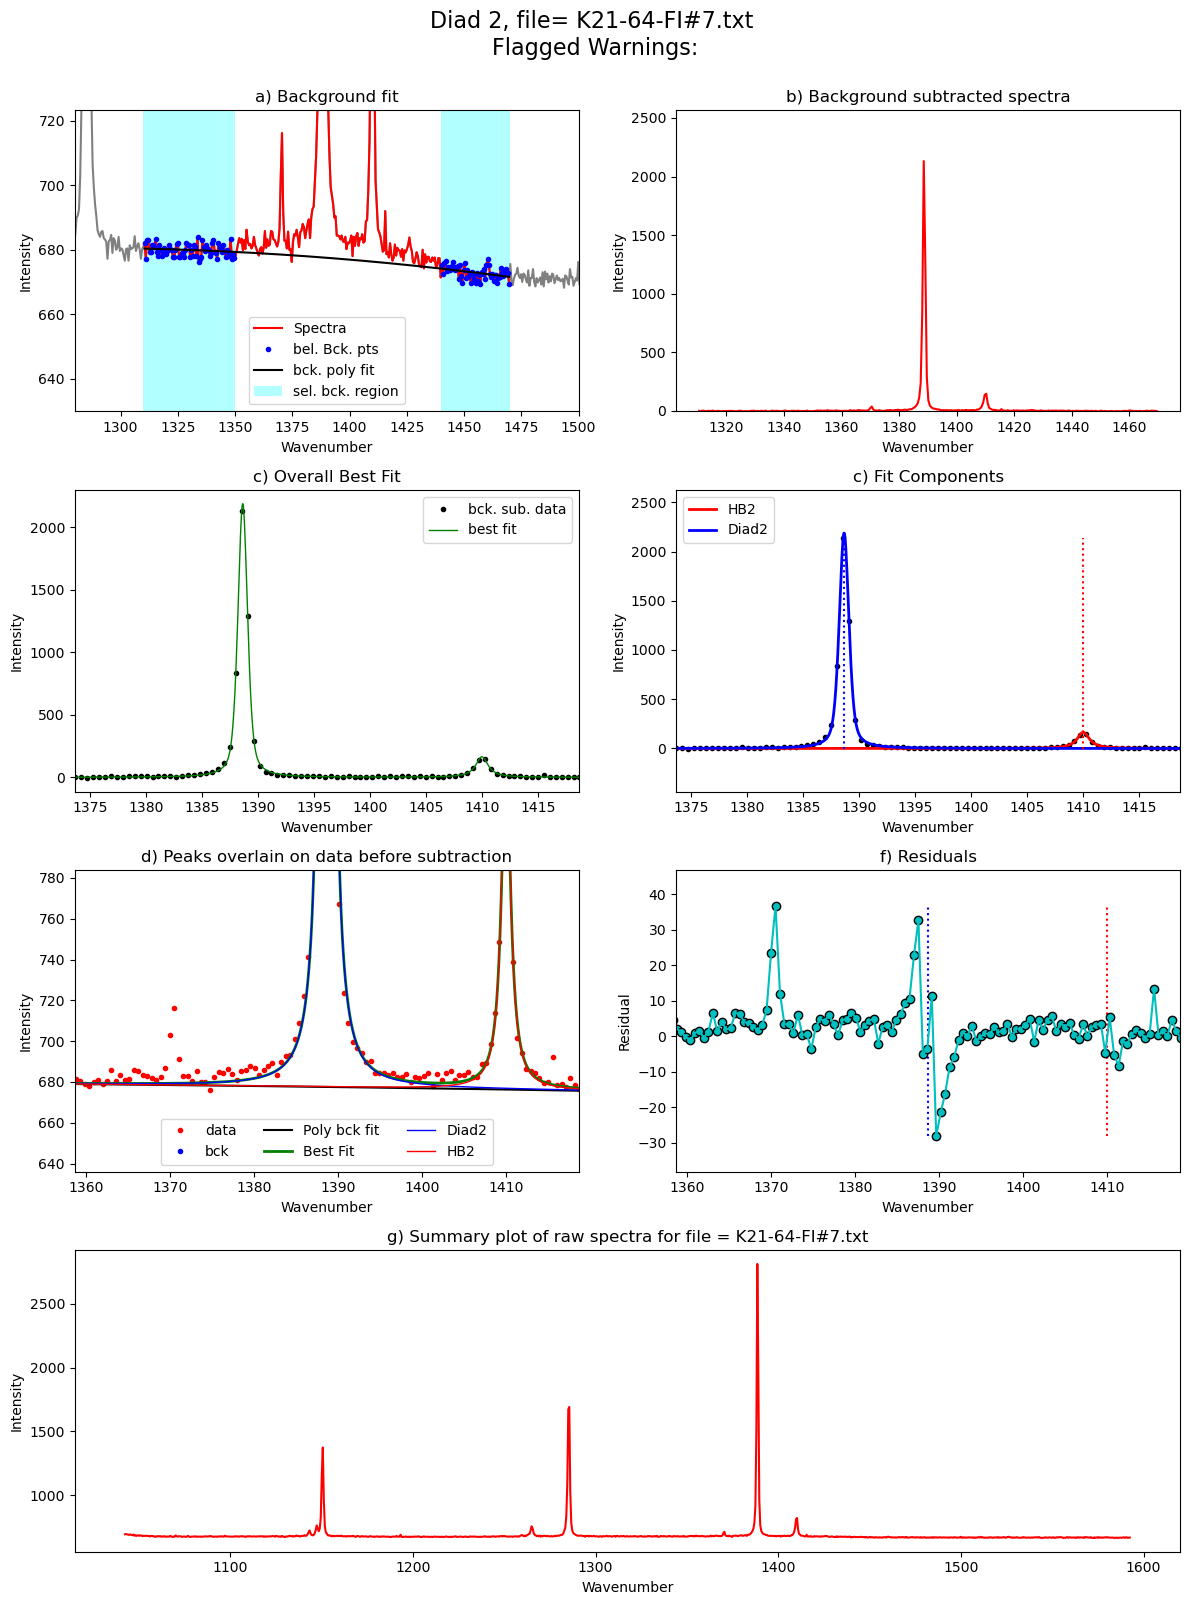

In [91]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config2.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config2.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config2,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


### Get file names that flagged a warning

In [92]:
refit_d1=(df_Merge['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Merge['Diad2_refit']!='Flagged Warnings:')
refit=refit_d1|refit_d2
print(sum(refit))
refit_names_1=df_Merge['filename'].loc[refit]
print(refit_names_1)

0
Series([], Name: filename, dtype: object)


### Have a look at different parameters
- This can help you spot really bad fits

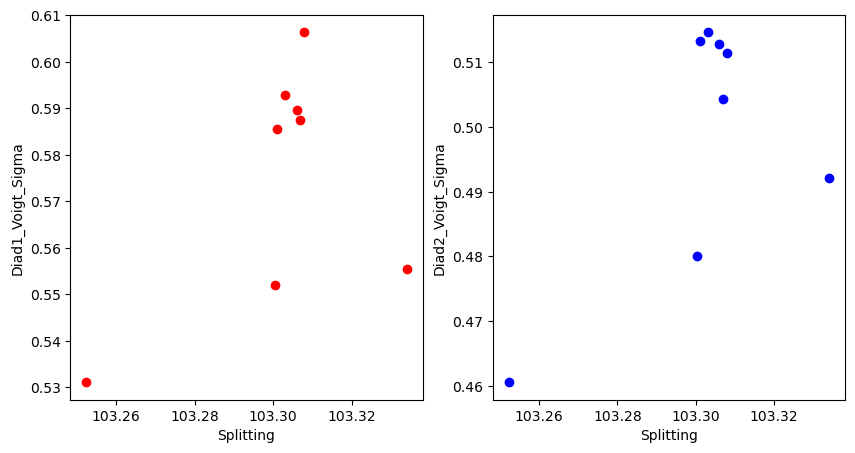

In [93]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x], df_Merge[y1], 'or')
ax2.plot(df_Merge[x], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

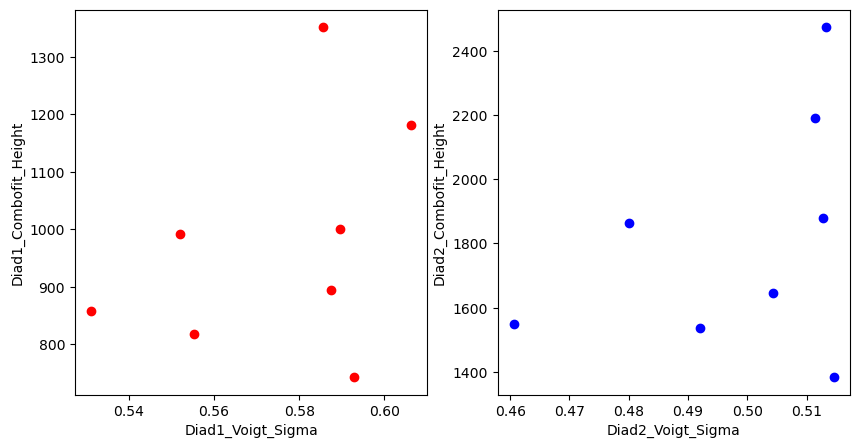

In [94]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x1], df_Merge[y1], 'or')
ax2.plot(df_Merge[x2], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x1].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x2].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

In [95]:
## Save parameters to excel

In [96]:
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)

In [97]:
combo.to_clipboard(excel=True)

In [98]:
combo

filename   Splitting   Split_σ  Split_err_abs  Diad1_Combofit_Cent  \
0  K21-61-FI#2  103.300362  0.002123       0.002816          1285.469785   
1  K21-61-FI#3  103.334041  0.002304       0.003163          1285.409011   
2  K21-64-FI#1  103.306920  0.002705       0.003641          1285.401627   
3  K21-64-FI#3  103.301043  0.002048       0.002822          1285.380946   
4  K21-64-FI#4  103.252439  0.002044       0.002665          1285.587010   
5  K21-64-FI#5  103.306015  0.002598       0.003486          1285.373787   
6  K21-64-FI#6  103.303152  0.003018       0.004095          1285.362602   
7  K21-64-FI#7  103.307922  0.002483       0.003451          1285.341481   

   Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0        0.001928             990.746056       1285.469835       1441.005278   
1        0.001974             818.181052       1285.409061       1234.184019   
2        0.002407             894.425329       1285.401677       1407.479767   
3        0.001736            1351.557697       1285.380996       2160.427947   
4        0.001892             858.254530       1285.587060       1177.004763   
5        0.002324            1000.375724       1285.373837       1575.137310   
6        0.002649             742.547444       1285.362652       1180.274083   
7        0.002049            1181.574655       1285.341531       1933.045143   

   Diad1_Voigt_Sigma  ...  HB2_Sigma     C13_Cent   C13_Area C13_Sigma  \
0           0.551999  ...   0.608348  1370.658392  35.133212  0.239654   
1           0.555327  ...   0.687584  1370.611645  26.032239  0.245717   
2           0.587393  ...   0.651079  1370.314366  34.718249  0.251966   
3           0.585607  ...   0.652836  1370.300962  50.762610  0.256462   
4           0.531050  ...   0.608035  1370.368375  19.104212  0.229792   
5           0.589493  ...   0.672970  1370.609023  32.098637  0.256271   
6           0.592892  ...   0.705259  1371.224875  14.843285  0.257173   
7           0.606317  ...   0.665011          NaN        NaN       NaN   

   Diad2_Gauss_Cent  Diad2_Gauss_Area  Diad2_Gauss_Sigma  Diad1_Gauss_Cent  \
0               NaN               NaN                NaN               NaN   
1               NaN               NaN                NaN               NaN   
2               NaN               NaN                NaN               NaN   
3               NaN               NaN                NaN               NaN   
4               NaN               NaN                NaN               NaN   
5               NaN               NaN                NaN               NaN   
6               NaN               NaN                NaN               NaN   
7               NaN               NaN                NaN               NaN   

   Diad1_Gauss_Area  Diad1_Gauss_Sigma  
0               NaN                NaN  
1               NaN                NaN  
2               NaN                NaN  
3               NaN                NaN  
4               NaN                NaN  
5               NaN                NaN  
6               NaN                NaN  
7               NaN                NaN  

[8 rows x 40 columns]